In [62]:
import pandas as pd
import yfinance as yf
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
import itertools
from matplotlib.dates import DateFormatter

In [63]:
# Load the final_pairs from the CSV file
final_pairs_df = pd.read_csv('filtered_pairs.csv')

# Convert the DataFrame back to a list of tuples
final_pairs = list(final_pairs_df.itertuples(index=False, name=None))

# Verify the imported final_pairs
print(final_pairs)

[('MDLZ', 'PEP'), ('ESS', 'UDR'), ('LNT', 'XEL'), ('AEP', 'CMS'), ('DUK', 'XEL'), ('BAC', 'PNC'), ('RSG', 'WM'), ('ED', 'LNT'), ('MCHP', 'NXPI'), ('COF', 'FITB'), ('PRU', 'WFC'), ('AEE', 'ATO'), ('GS', 'JPM'), ('AZO', 'ORLY'), ('ED', 'XEL'), ('DUK', 'ED'), ('AMT', 'SBAC'), ('DUK', 'LNT'), ('ETR', 'EVRG'), ('AVB', 'EQR')]


In [64]:
# Load your stock data
file_path = 'SPY_cleaned_data.csv'
data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Define the start and end dates for data fetching
data_start_date = '2018-01-01'
data_end_date = '2023-12-31'
trading_start_date = '2023-01-01'
trading_end_date = '2023-12-31'

trading_period_years = (pd.to_datetime(trading_end_date) - pd.to_datetime(trading_start_date)).days / 365.25


# Filter the data for the required date range
data = data[(data.index >= data_start_date) & (data.index <= data_end_date)]

In [65]:
# Define the required constants
t = 25
const = 1.5
stop_loss = 0.05
initial_capital = 10000

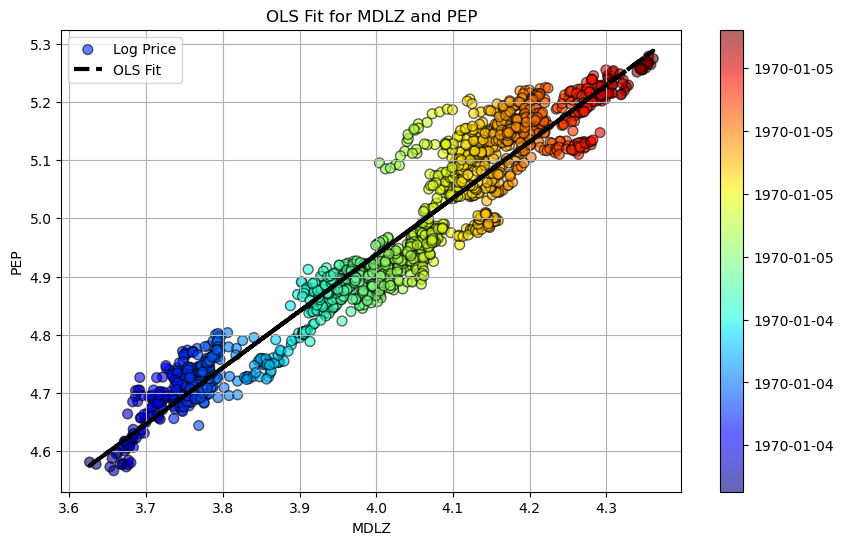

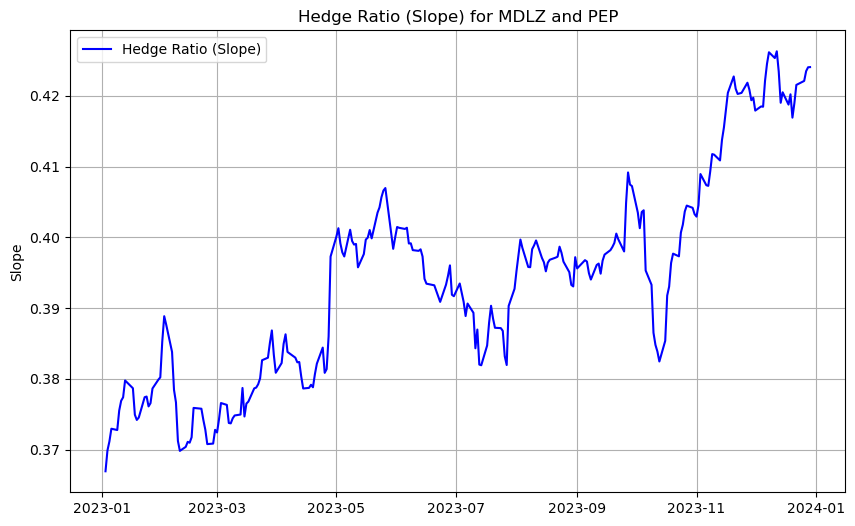

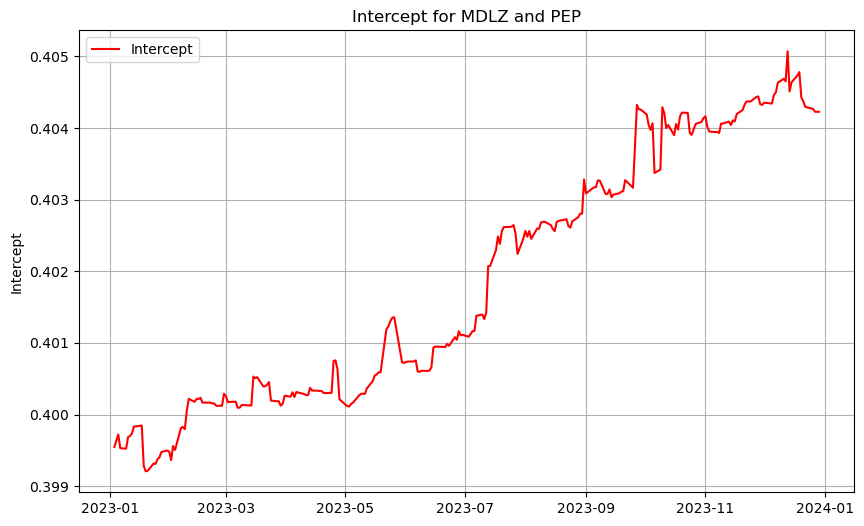

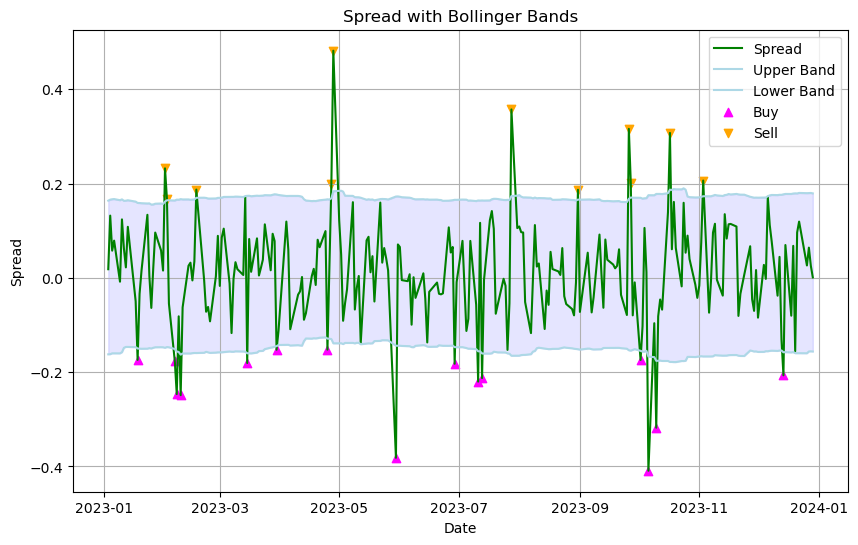

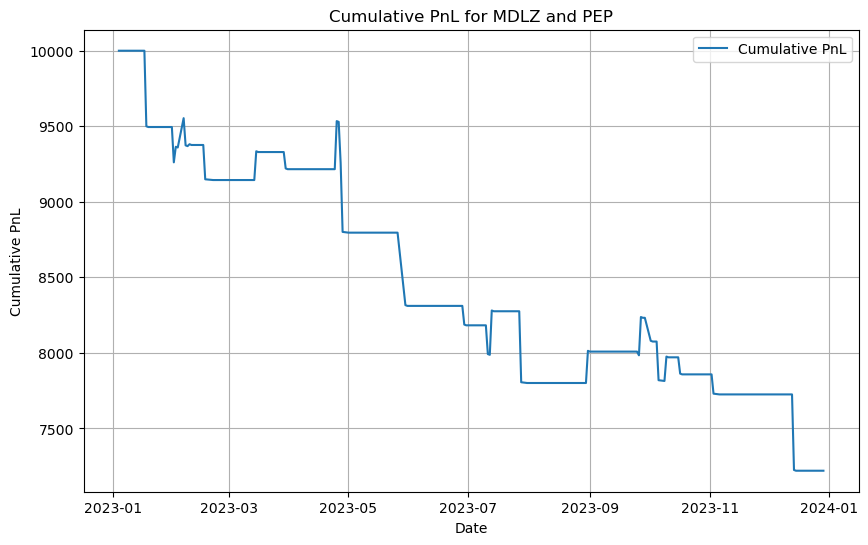

Performance Metrics for pair MDLZ and PEP:
Cumulative Return: -27.80%
Sharpe Ratio: -2.010
Sortino Ratio: -1.077
Max Drawdown: -25.02%
Calmar Ratio: -1.11
No of trade: 22.0
Signals for pair MDLZ and PEP:
              spread  upper_band  lower_band  moving_average_30   long  short  \
date                                                                            
2023-01-03  0.018228    0.163677   -0.162271           0.014498  False  False   
2023-01-04  0.131938    0.165814   -0.161978           0.019903  False  False   
2023-01-05  0.057644    0.166639   -0.160187           0.024452  False  False   
2023-01-06  0.078813    0.167036   -0.160158           0.024693  False  False   
2023-01-09 -0.008204    0.164643   -0.160249           0.022217  False  False   

            exit  buy  sell  position  
date                                   
2023-01-03  True  NaN   NaN         0  
2023-01-04  True  NaN   NaN         0  
2023-01-05  True  NaN   NaN         0  
2023-01-06  True  NaN   NaN 

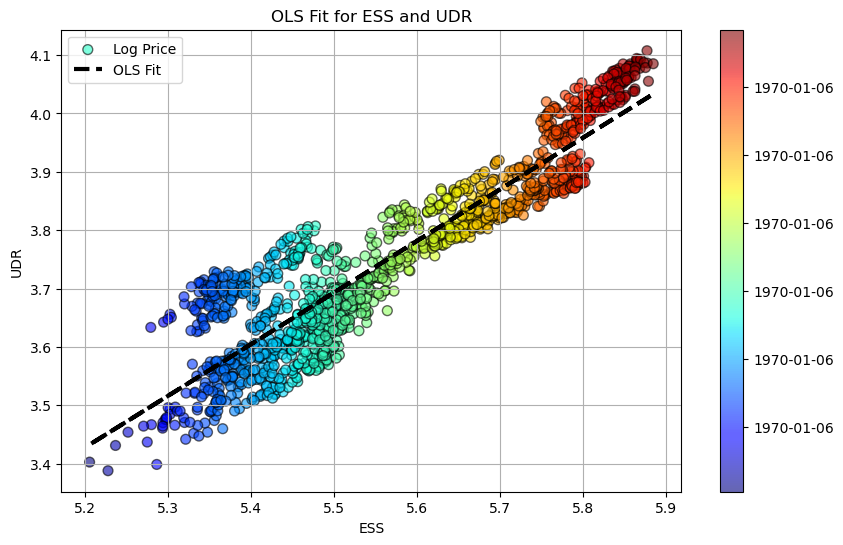

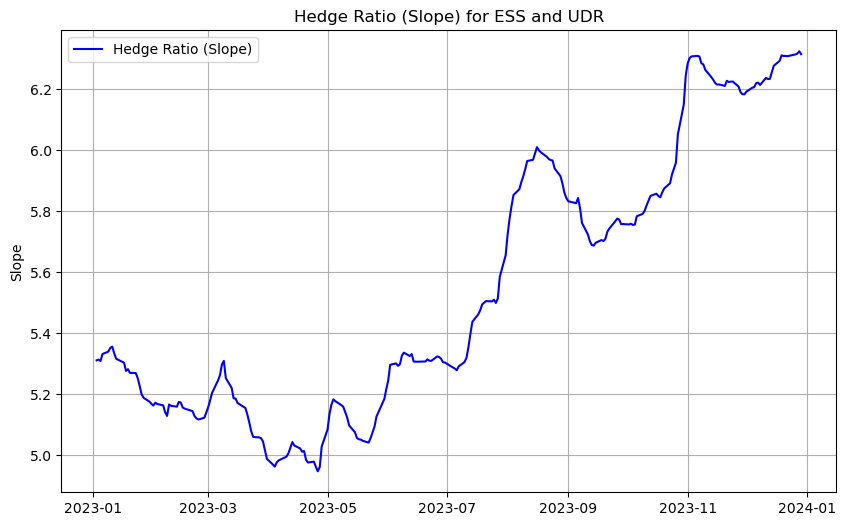

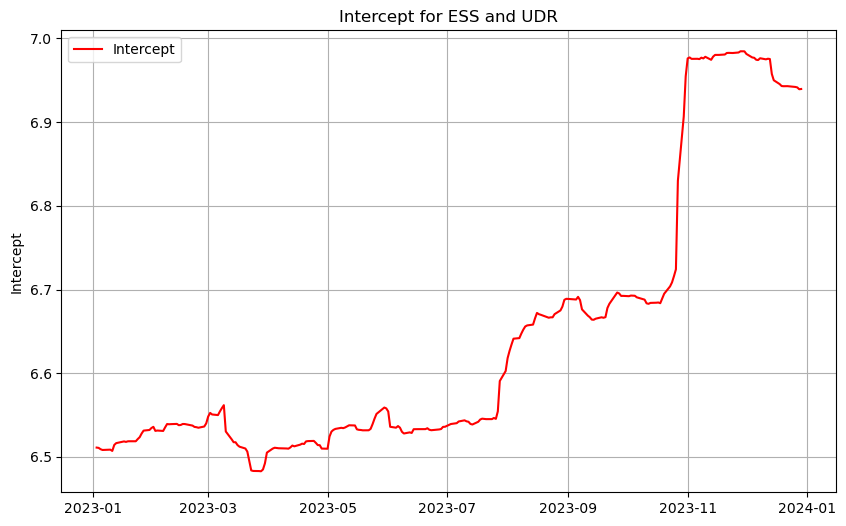

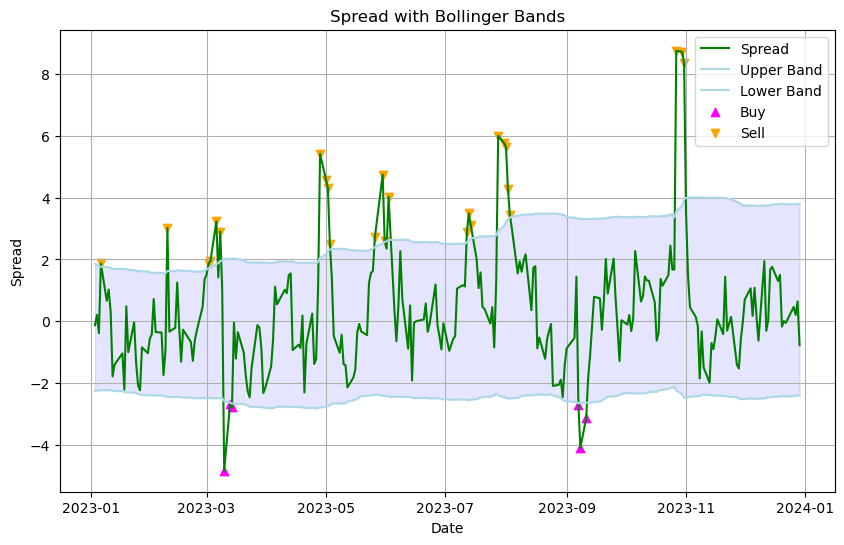

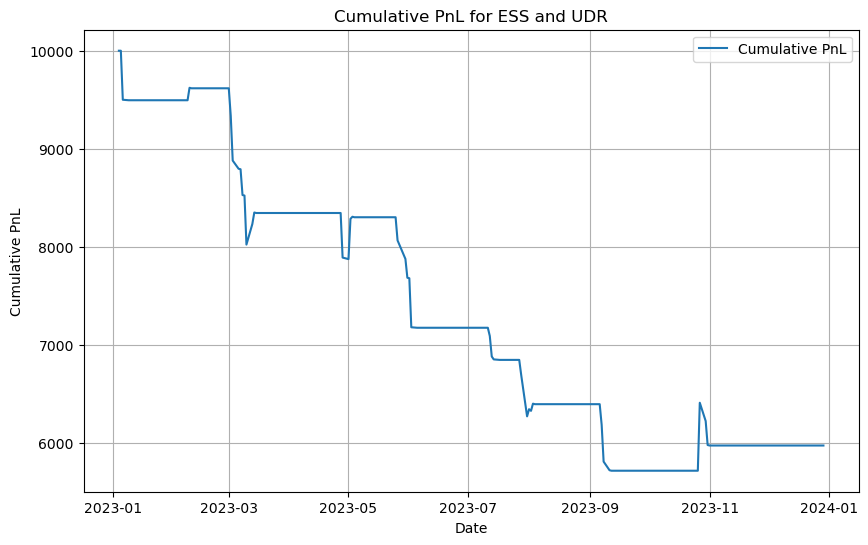

Performance Metrics for pair ESS and UDR:
Cumulative Return: -40.26%
Sharpe Ratio: -2.479
Sortino Ratio: -1.464
Max Drawdown: -35.55%
Calmar Ratio: -1.14
No of trade: 12.0
Signals for pair ESS and UDR:
              spread  upper_band  lower_band  moving_average_30   long  short  \
date                                                                            
2023-01-03 -0.131421    1.859388   -2.254888           0.406556  False  False   
2023-01-04  0.204708    1.824279   -2.248469           0.467914  False  False   
2023-01-05 -0.387307    1.775009   -2.241851           0.461056  False  False   
2023-01-06  1.867816    1.762600   -2.236293           0.535048  False   True   
2023-01-09  0.657708    1.750108   -2.234252           0.572454  False  False   

             exit  buy      sell  position  
date                                        
2023-01-03   True  NaN       NaN         0  
2023-01-04   True  NaN       NaN         0  
2023-01-05   True  NaN       NaN         0  
2023-

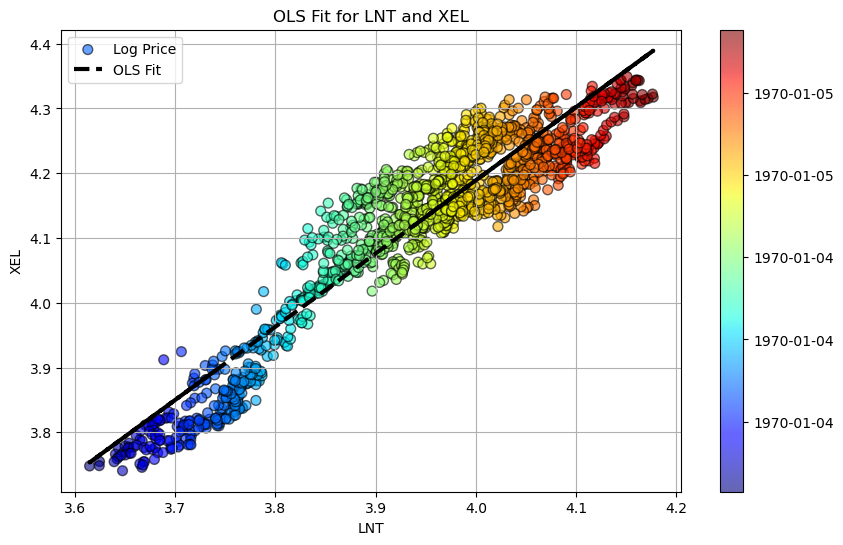

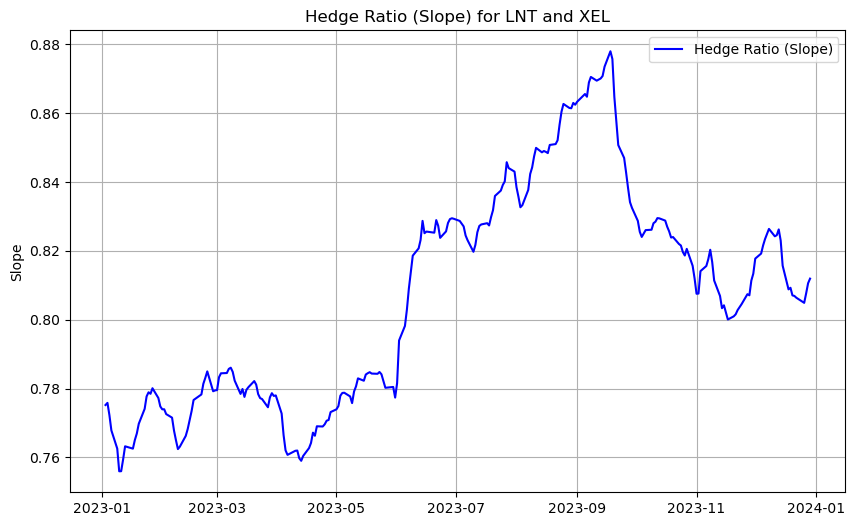

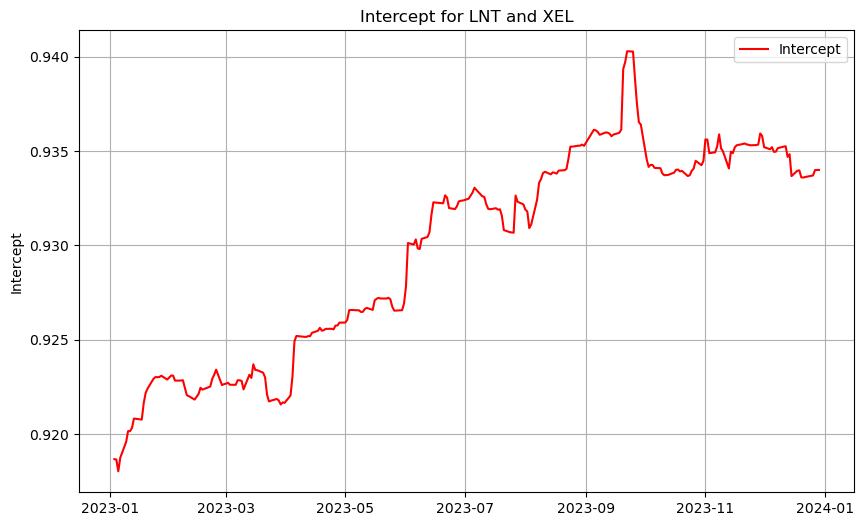

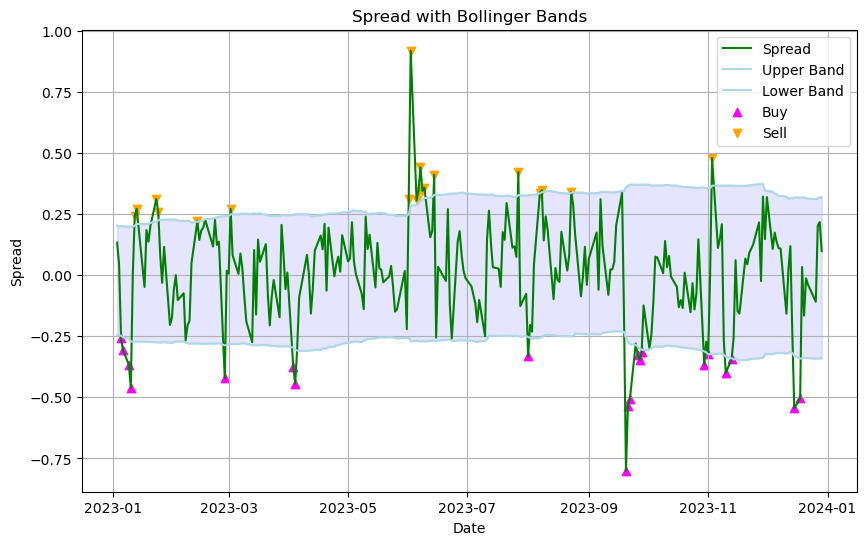

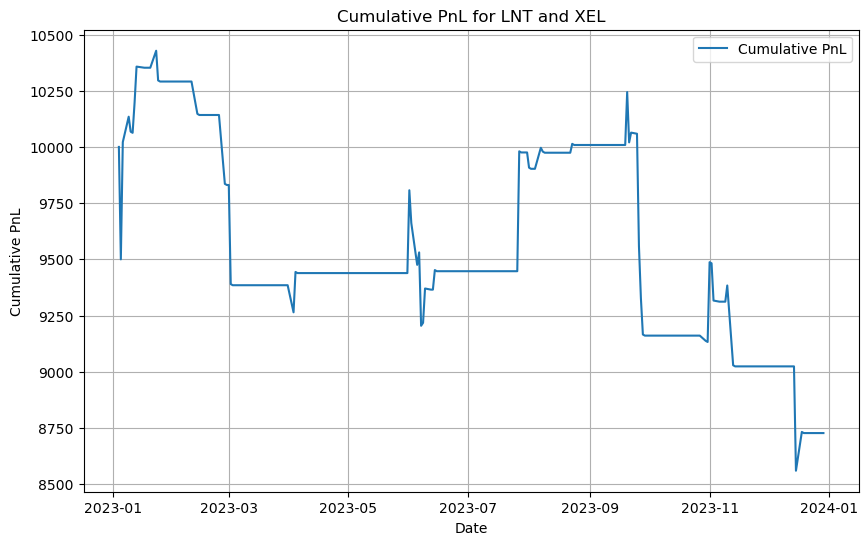

Performance Metrics for pair LNT and XEL:
Cumulative Return: -12.73%
Sharpe Ratio: -0.799
Sortino Ratio: -0.516
Max Drawdown: -17.85%
Calmar Ratio: -0.72
No of trade: 20.0
Signals for pair LNT and XEL:
              spread  upper_band  lower_band  moving_average_30   long  short  \
date                                                                            
2023-01-03  0.133185    0.202928   -0.245779          -0.025097  False  False   
2023-01-04  0.043934    0.200102   -0.245296          -0.034050  False  False   
2023-01-05 -0.258403    0.200830   -0.247763          -0.045298   True  False   
2023-01-06 -0.306491    0.200171   -0.253575          -0.055929   True  False   
2023-01-09 -0.366722    0.199081   -0.260909          -0.072969   True  False   

             exit       buy  sell  position  
date                                         
2023-01-03   True       NaN   NaN         0  
2023-01-04   True       NaN   NaN         0  
2023-01-05  False -0.258403   NaN         1  


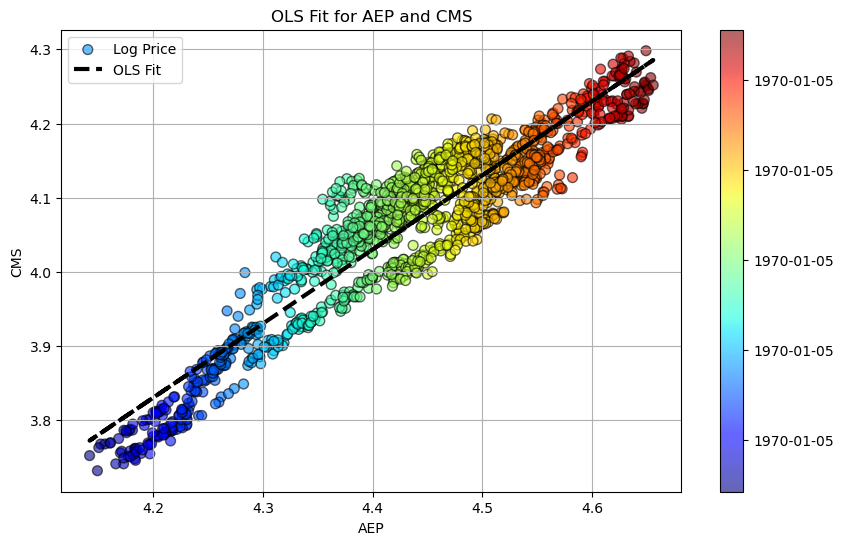

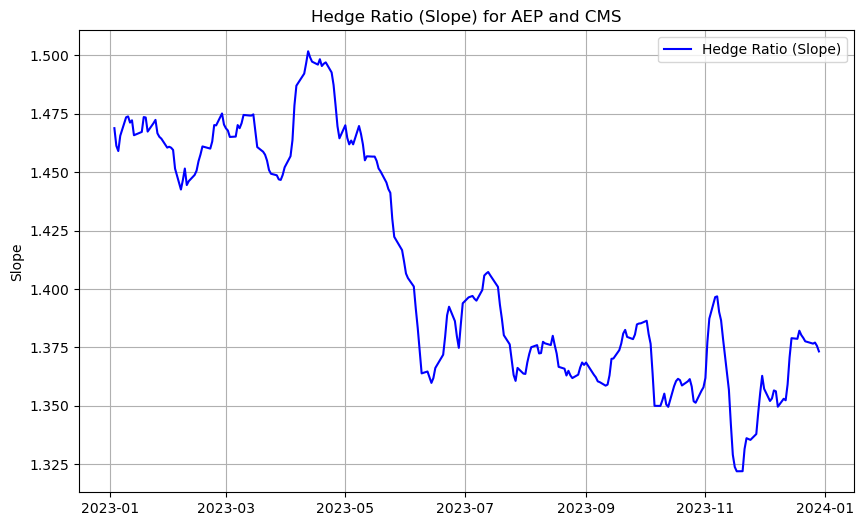

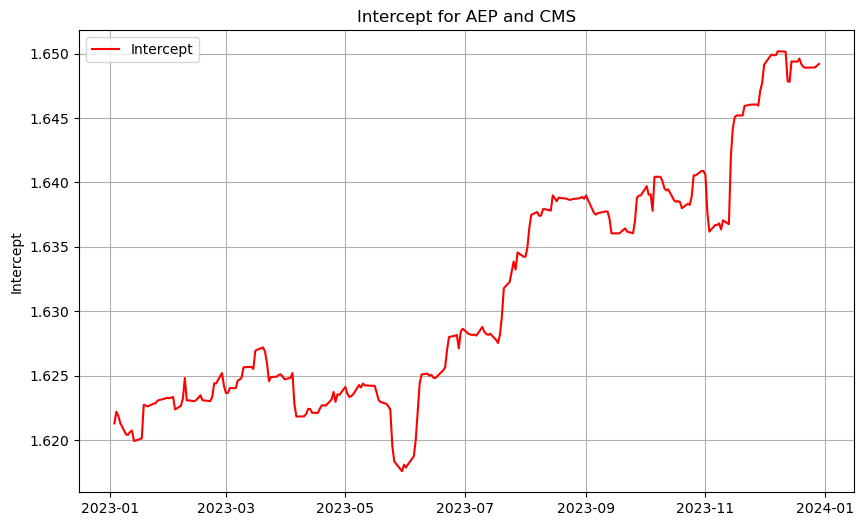

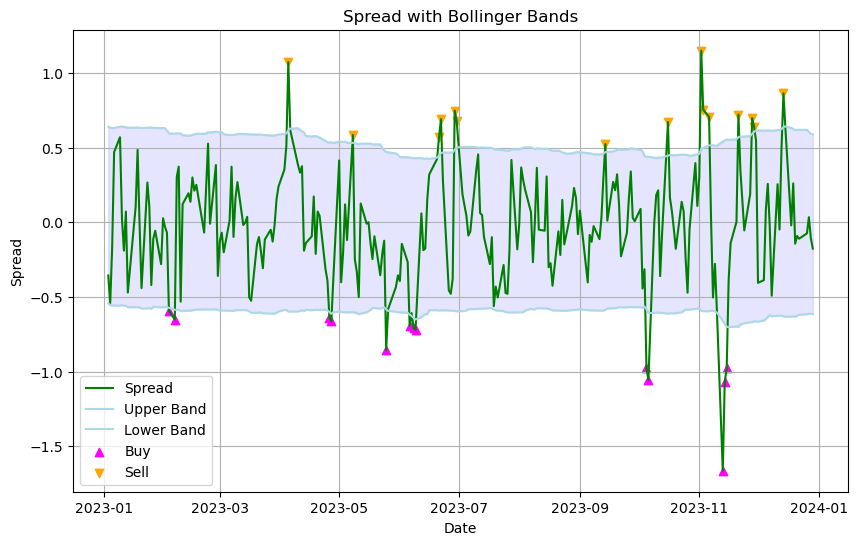

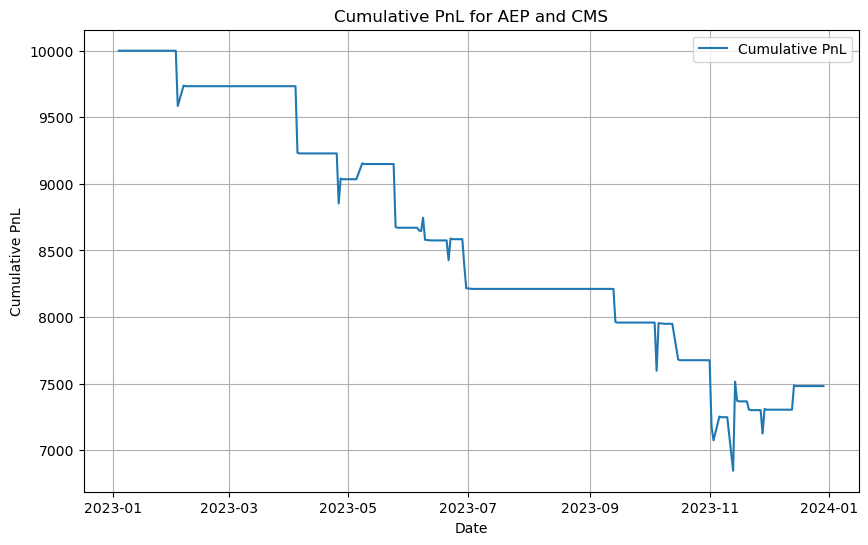

Performance Metrics for pair AEP and CMS:
Cumulative Return: -25.19%
Sharpe Ratio: -1.629
Sortino Ratio: -0.943
Max Drawdown: -27.75%
Calmar Ratio: -0.91
No of trade: 17.0
Signals for pair AEP and CMS:
              spread  upper_band  lower_band  moving_average_30   long  short  \
date                                                                            
2023-01-03 -0.356103    0.638845   -0.543003          -0.062455  False  False   
2023-01-04 -0.541761    0.635556   -0.553966          -0.079504  False  False   
2023-01-05 -0.166714    0.630556   -0.557262          -0.115854  False  False   
2023-01-06  0.470588    0.632762   -0.557658          -0.124401  False  False   
2023-01-09  0.570103    0.640649   -0.558177          -0.127674  False  False   

            exit  buy  sell  position  
date                                   
2023-01-03  True  NaN   NaN         0  
2023-01-04  True  NaN   NaN         0  
2023-01-05  True  NaN   NaN         0  
2023-01-06  True  NaN   NaN   

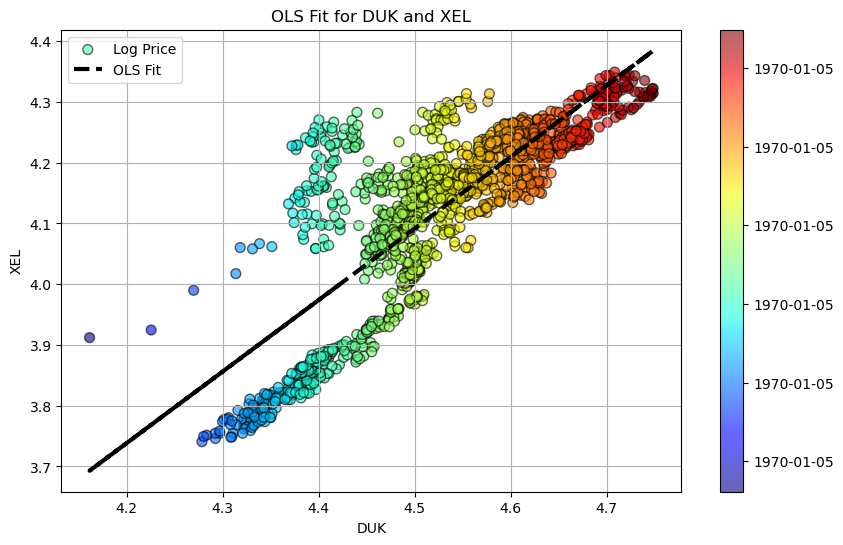

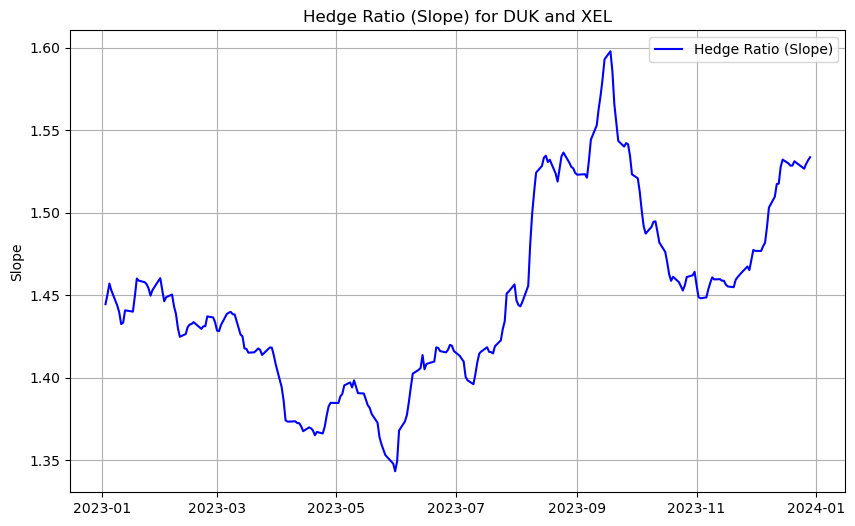

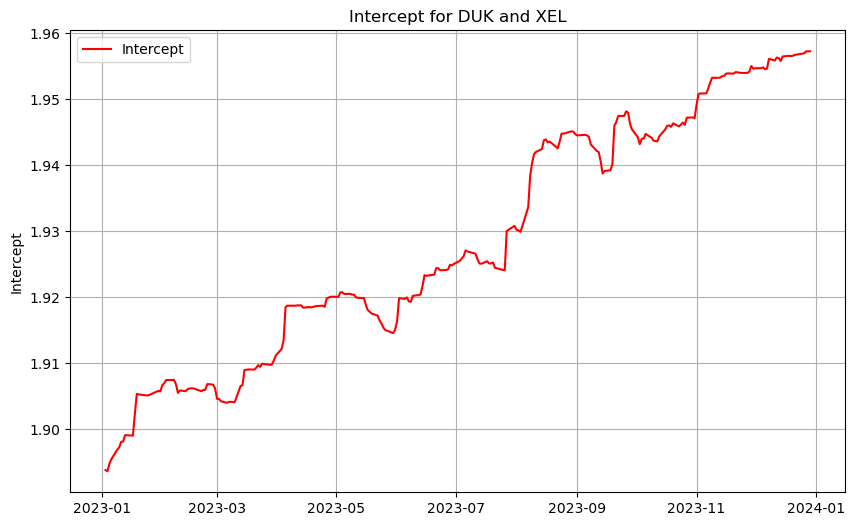

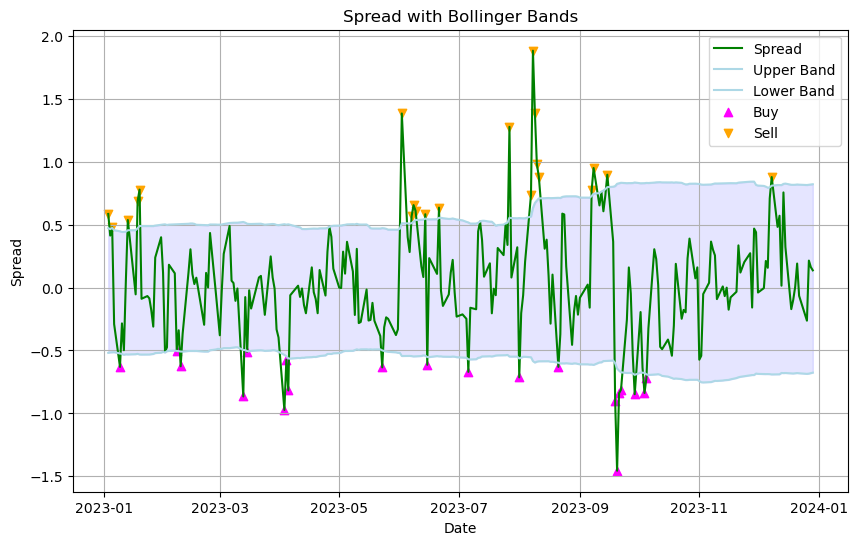

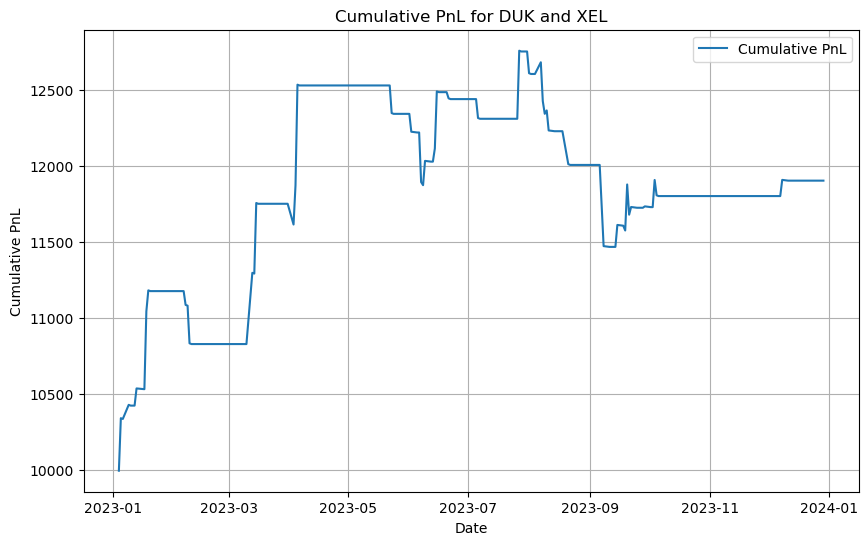

Performance Metrics for pair DUK and XEL:
Cumulative Return: 19.02%
Sharpe Ratio: 1.209
Sortino Ratio: 1.281
Max Drawdown: -12.23%
Calmar Ratio: 1.56
No of trade: 26.0
Signals for pair DUK and XEL:
              spread  upper_band  lower_band  moving_average_30   long  short  \
date                                                                            
2023-01-03  0.584707    0.471821   -0.518778           0.107444  False   True   
2023-01-04  0.413049    0.464183   -0.515358           0.134616  False  False   
2023-01-05  0.478000    0.473500   -0.514814           0.160210  False   True   
2023-01-06 -0.290452    0.455584   -0.513446           0.148598  False  False   
2023-01-09 -0.630428    0.447094   -0.523484           0.120309   True  False   

             exit       buy      sell  position  
date                                             
2023-01-03  False       NaN  0.584707        -1  
2023-01-04   True       NaN       NaN         0  
2023-01-05  False       NaN  0.478

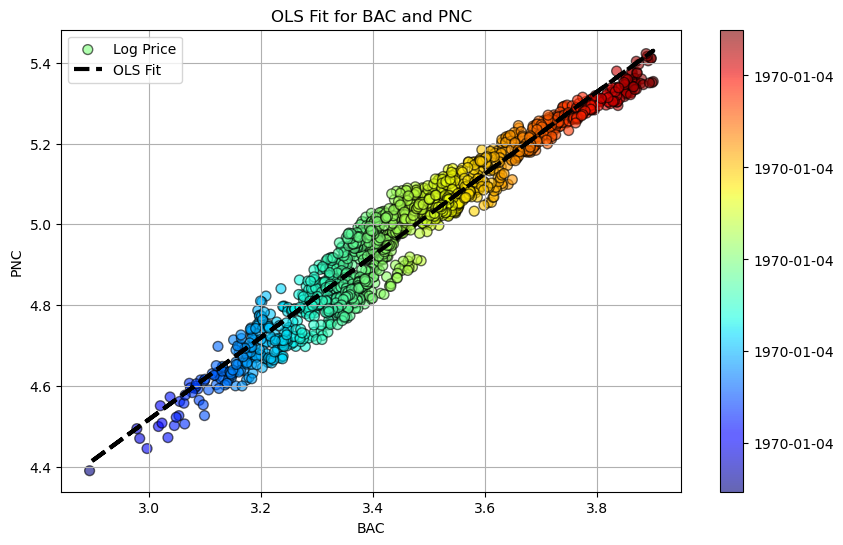

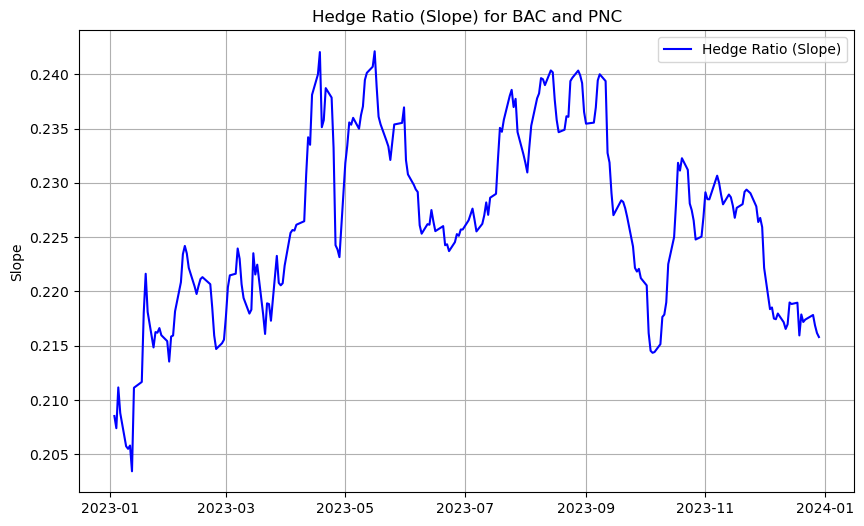

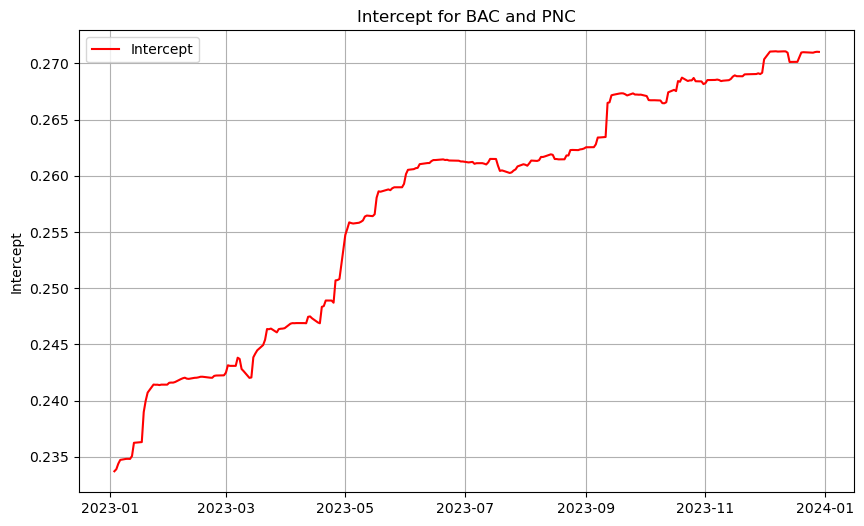

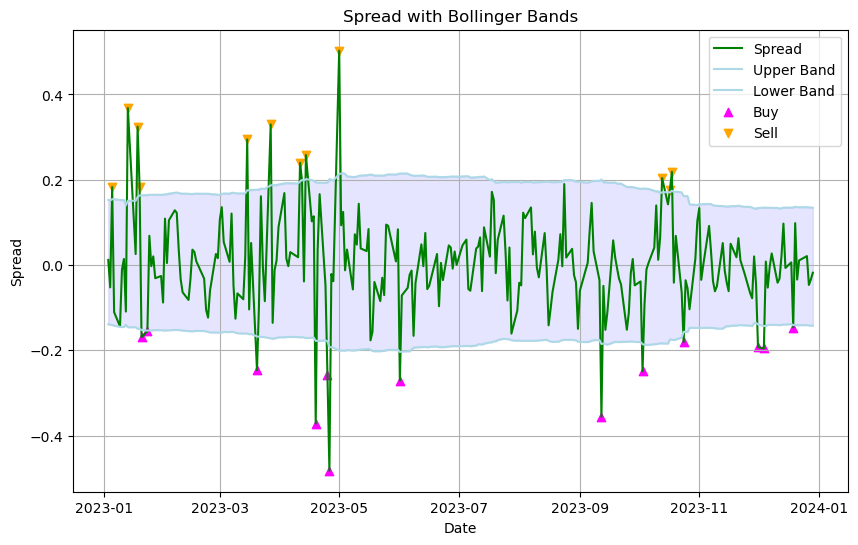

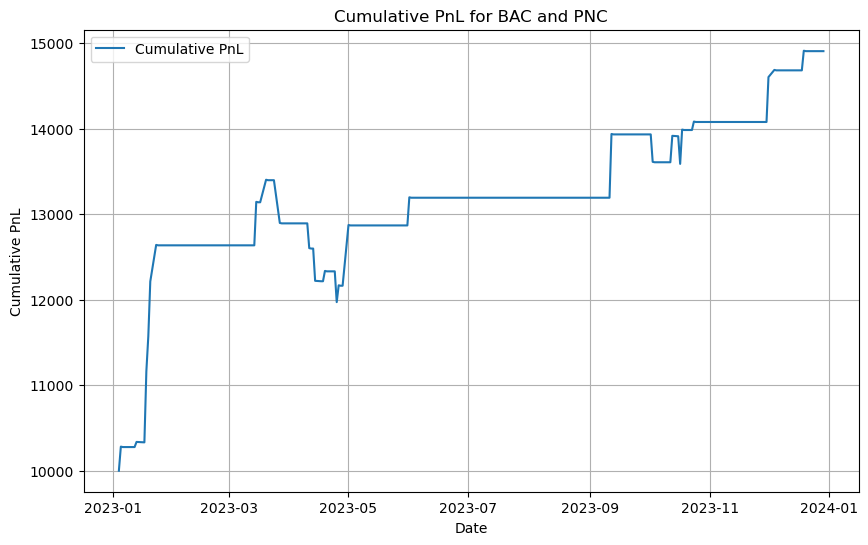

Performance Metrics for pair BAC and PNC:
Cumulative Return: 49.08%
Sharpe Ratio: 2.348
Sortino Ratio: 1.965
Max Drawdown: -13.61%
Calmar Ratio: 3.62
No of trade: 20.0
Signals for pair BAC and PNC:
              spread  upper_band  lower_band  moving_average_30   long  short  \
date                                                                            
2023-01-03  0.011903    0.152657   -0.139208          -0.036997  False  False   
2023-01-04 -0.052548    0.151251   -0.140119          -0.035636  False  False   
2023-01-05  0.182788    0.154173   -0.140860          -0.027150  False   True   
2023-01-06 -0.110686    0.154208   -0.142455          -0.027729  False  False   
2023-01-09 -0.144101    0.152679   -0.145123          -0.030215  False  False   

             exit  buy      sell  position  
date                                        
2023-01-03   True  NaN       NaN         0  
2023-01-04   True  NaN       NaN         0  
2023-01-05  False  NaN  0.182788        -1  
2023-01-0

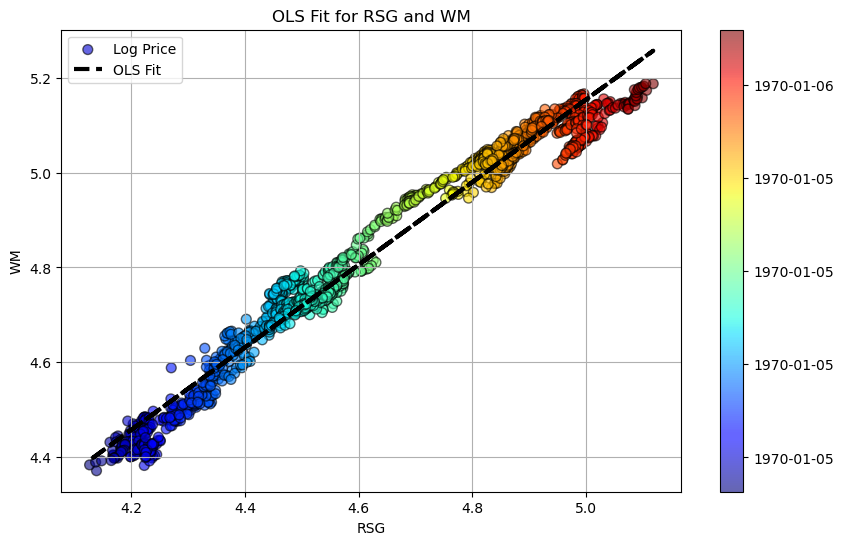

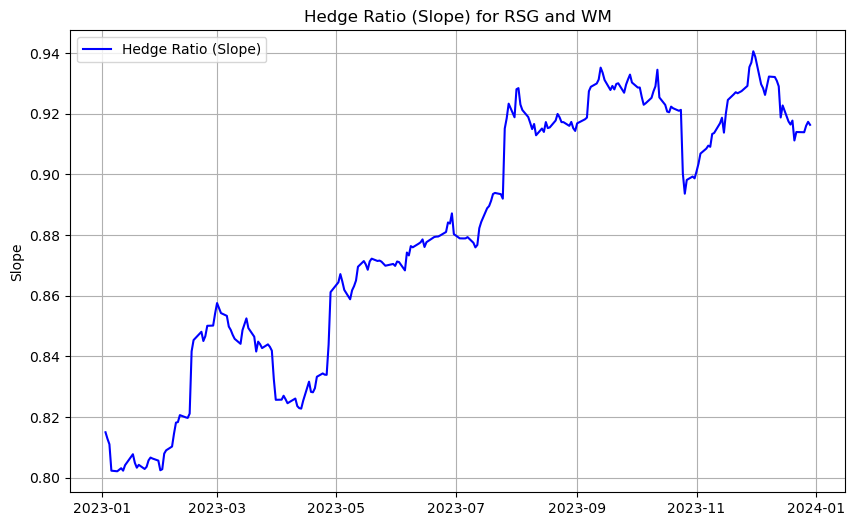

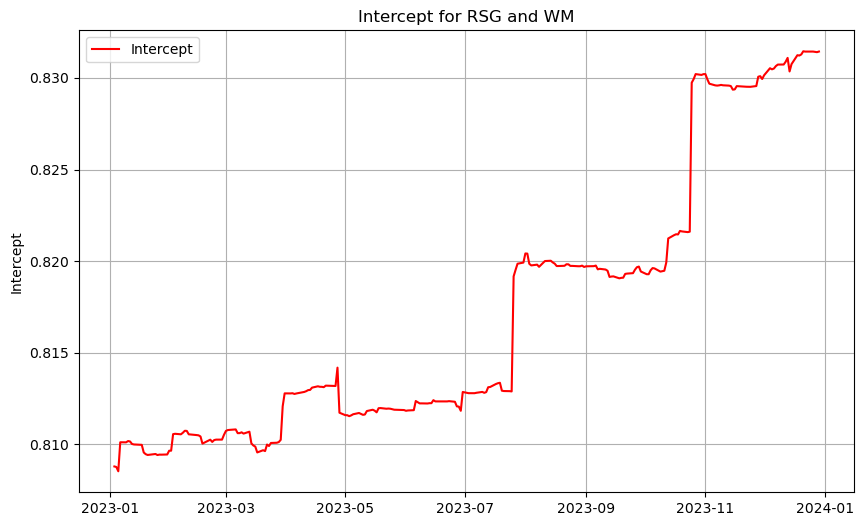

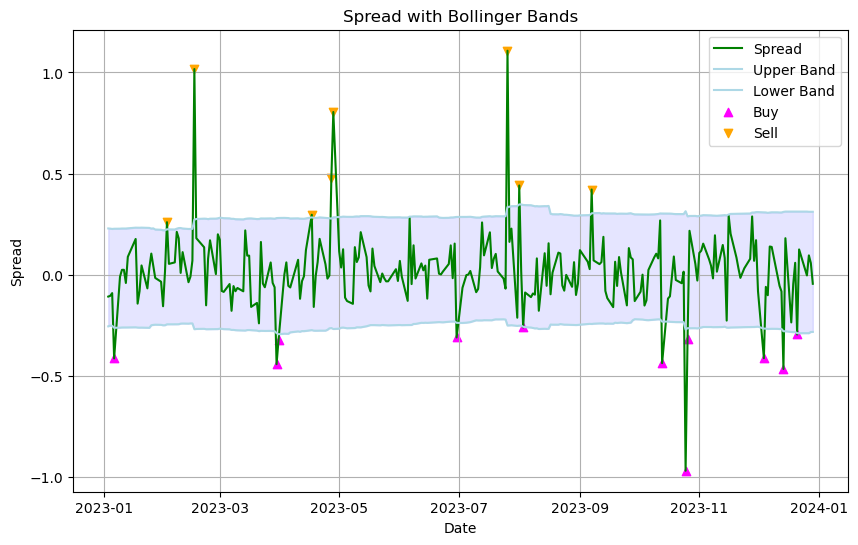

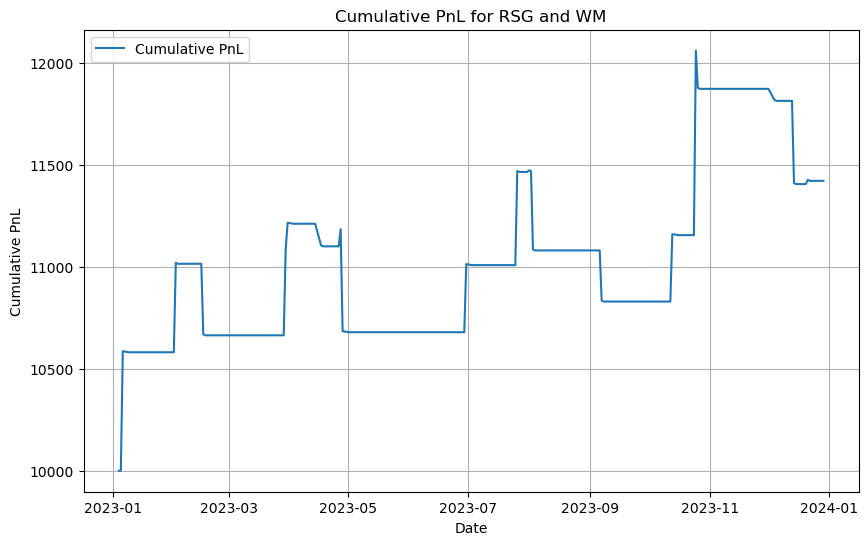

Performance Metrics for pair RSG and WM:
Cumulative Return: 14.21%
Sharpe Ratio: 0.858
Sortino Ratio: 0.577
Max Drawdown: -6.42%
Calmar Ratio: 2.22
No of trade: 16.0
Signals for pair RSG and WM:
              spread  upper_band  lower_band  moving_average_30   long  short  \
date                                                                            
2023-01-03 -0.107590    0.229126   -0.254596          -0.012751  False  False   
2023-01-04 -0.104096    0.228253   -0.251051          -0.019049  False  False   
2023-01-05 -0.090469    0.226702   -0.252331          -0.018371  False  False   
2023-01-06 -0.413255    0.227660   -0.261854          -0.034150   True  False   
2023-01-09 -0.009465    0.228045   -0.261255          -0.034208  False  False   

             exit       buy  sell  position  
date                                         
2023-01-03   True       NaN   NaN         0  
2023-01-04   True       NaN   NaN         0  
2023-01-05   True       NaN   NaN         0  
2023-01

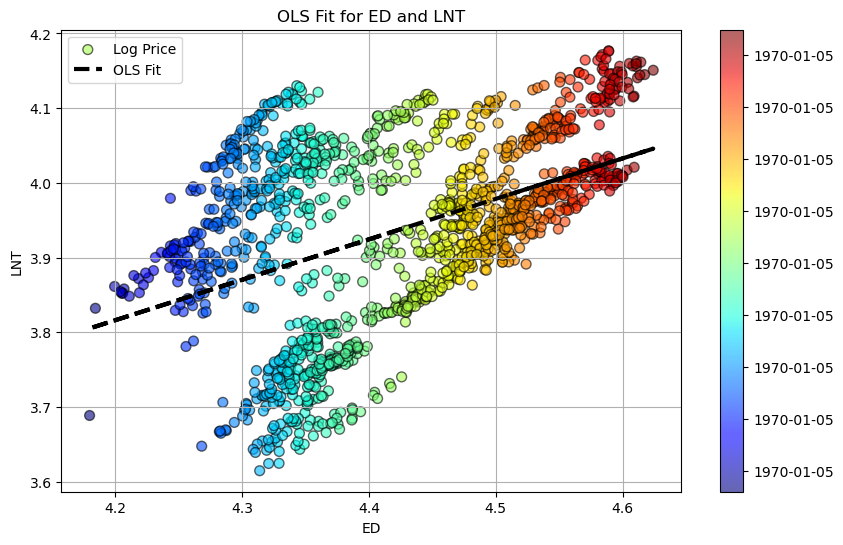

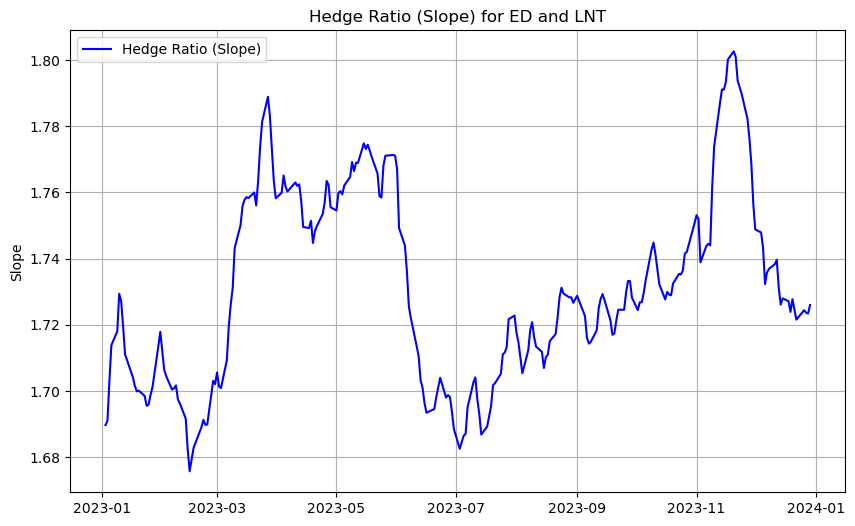

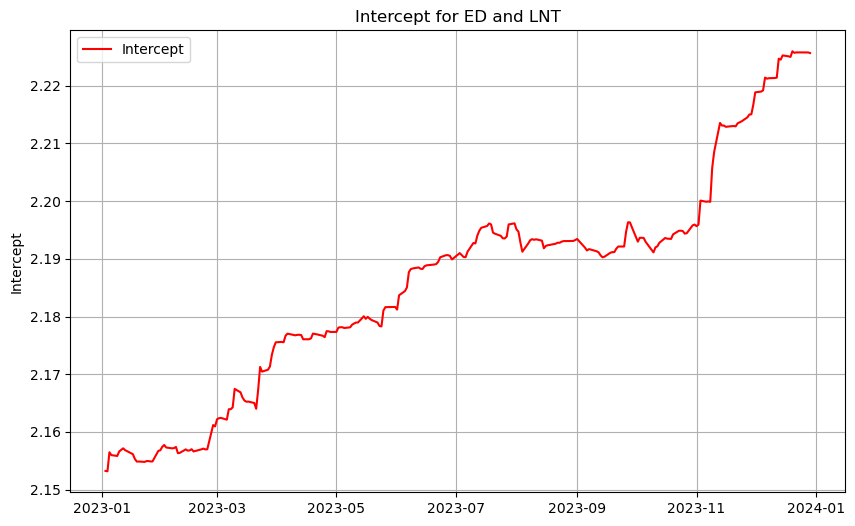

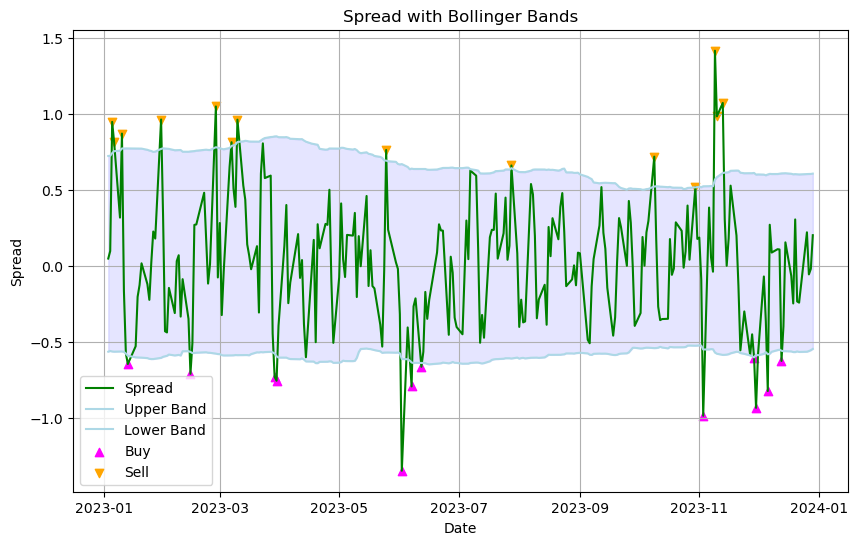

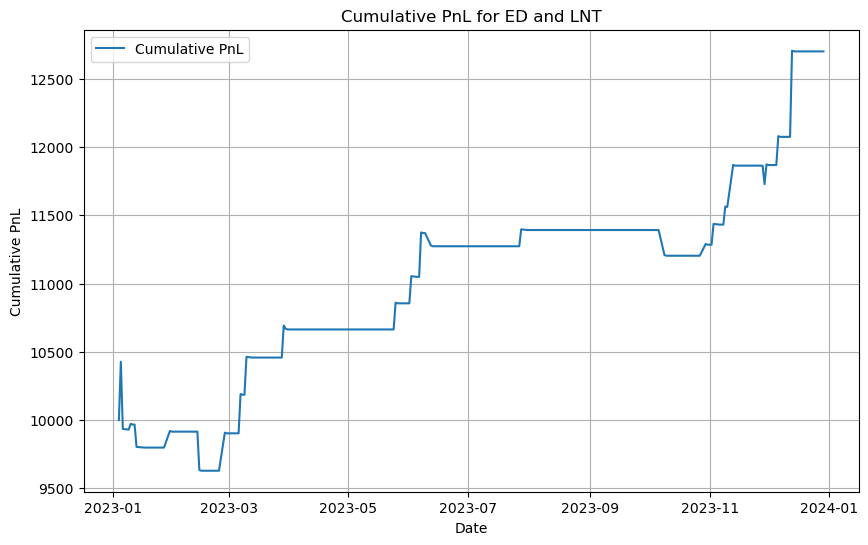

Performance Metrics for pair ED and LNT:
Cumulative Return: 27.00%
Sharpe Ratio: 2.093
Sortino Ratio: 1.576
Max Drawdown: -7.84%
Calmar Ratio: 3.45
No of trade: 21.0
Signals for pair ED and LNT:
              spread  upper_band  lower_band  moving_average_30   long  short  \
date                                                                            
2023-01-03  0.046854    0.722163   -0.566322           0.131858  False  False   
2023-01-04  0.096132    0.723362   -0.561566           0.118693  False  False   
2023-01-05  0.946805    0.740764   -0.564999           0.131411  False   True   
2023-01-06  0.812356    0.753885   -0.566255           0.129551  False   True   
2023-01-09  0.316396    0.756549   -0.564918           0.113284  False  False   

             exit  buy      sell  position  
date                                        
2023-01-03   True  NaN       NaN         0  
2023-01-04   True  NaN       NaN         0  
2023-01-05  False  NaN  0.946805        -1  
2023-01-06  

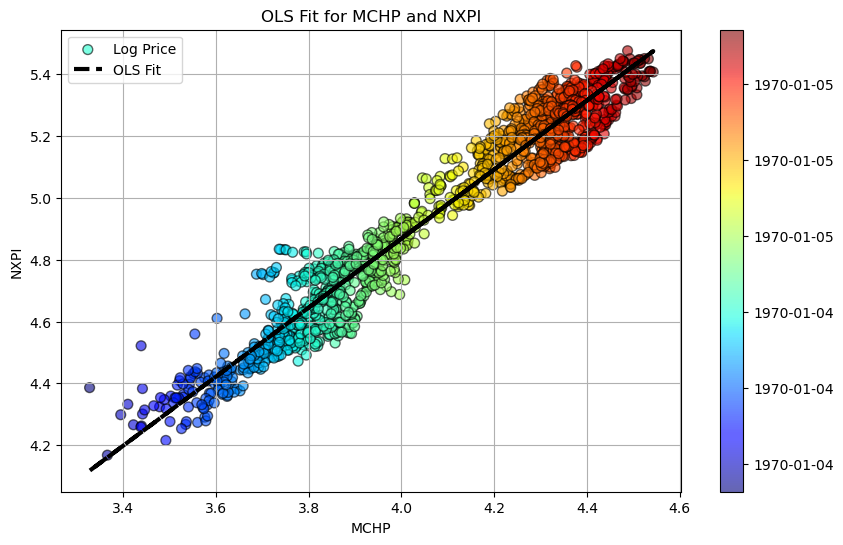

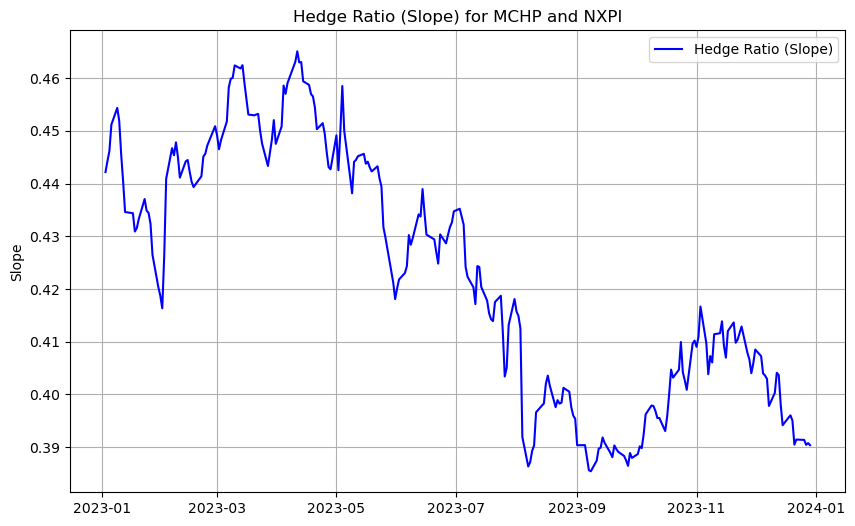

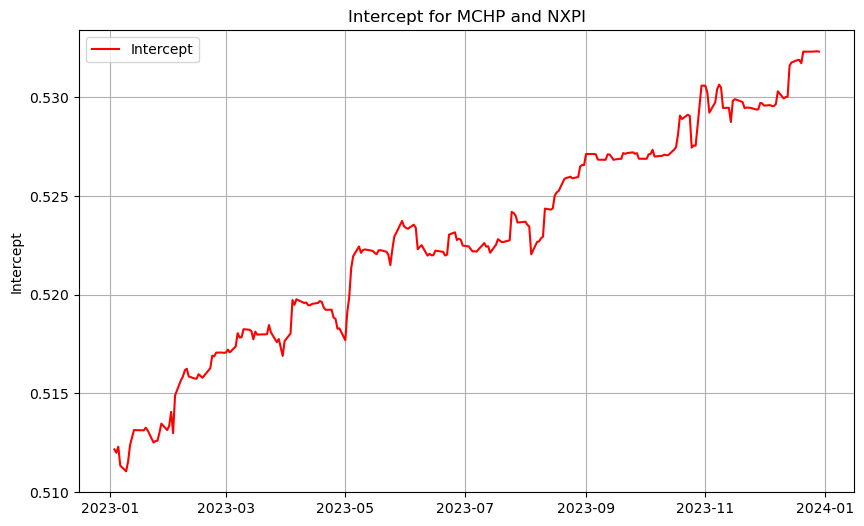

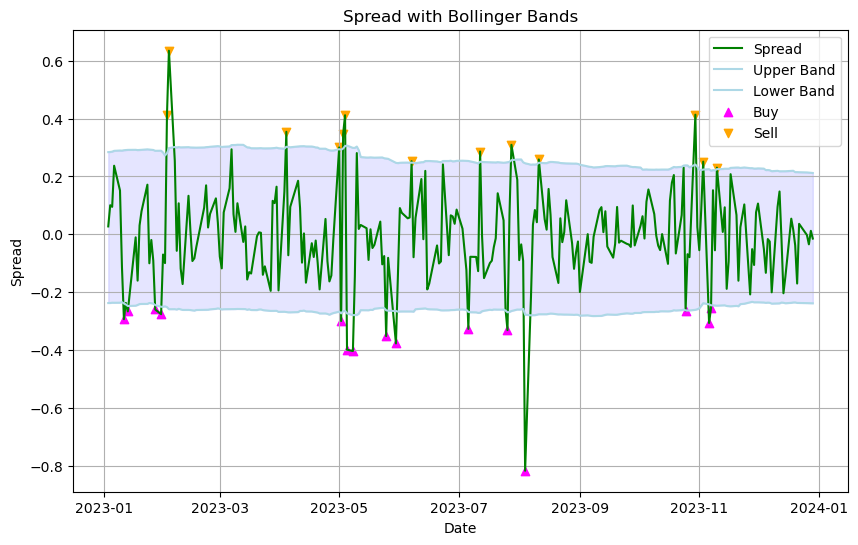

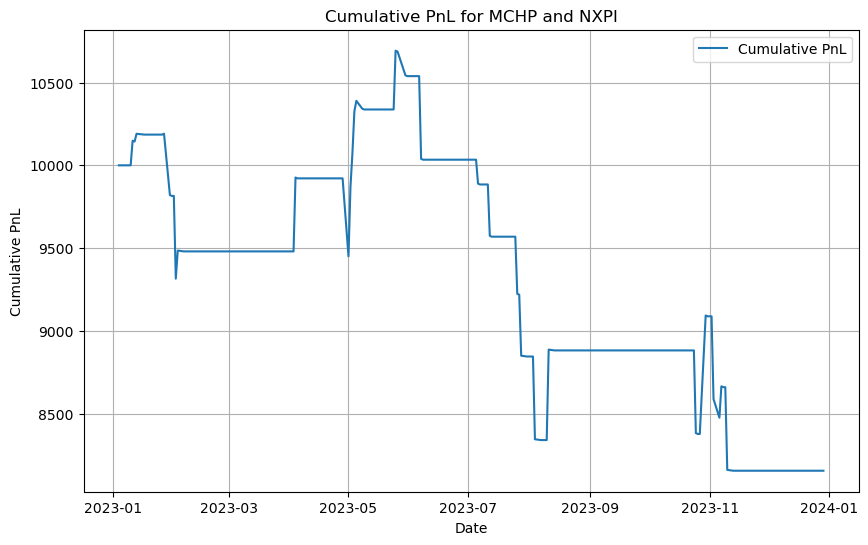

Performance Metrics for pair MCHP and NXPI:
Cumulative Return: -18.46%
Sharpe Ratio: -0.955
Sortino Ratio: -0.570
Max Drawdown: -23.39%
Calmar Ratio: -0.79
No of trade: 23.0
Signals for pair MCHP and NXPI:
              spread  upper_band  lower_band  moving_average_30   long  short  \
date                                                                            
2023-01-03  0.027328    0.284005   -0.237397           0.016525  False  False   
2023-01-04  0.100536    0.284578   -0.237183           0.024670  False  False   
2023-01-05  0.094968    0.285638   -0.236287           0.033163  False  False   
2023-01-06  0.236966    0.288467   -0.236430           0.035350  False  False   
2023-01-09  0.151388    0.289575   -0.236261           0.034642  False  False   

            exit  buy  sell  position  
date                                   
2023-01-03  True  NaN   NaN         0  
2023-01-04  True  NaN   NaN         0  
2023-01-05  True  NaN   NaN         0  
2023-01-06  True  NaN   Na

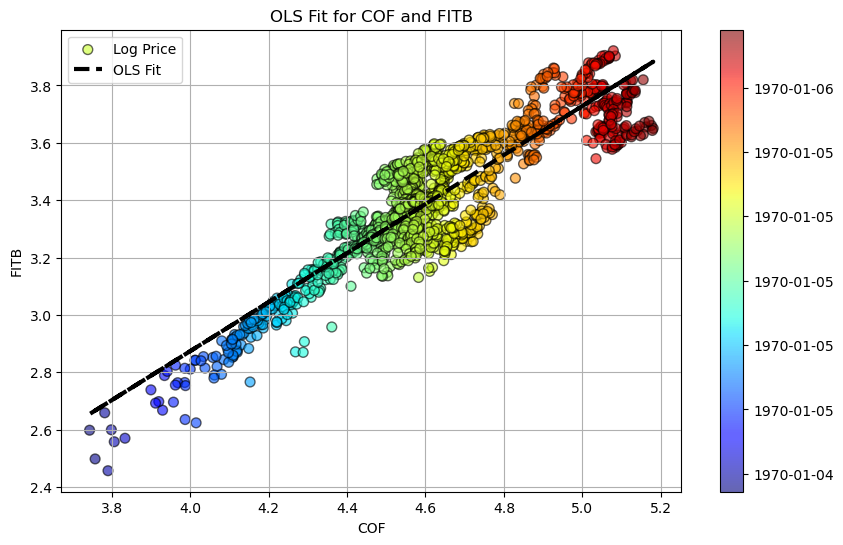

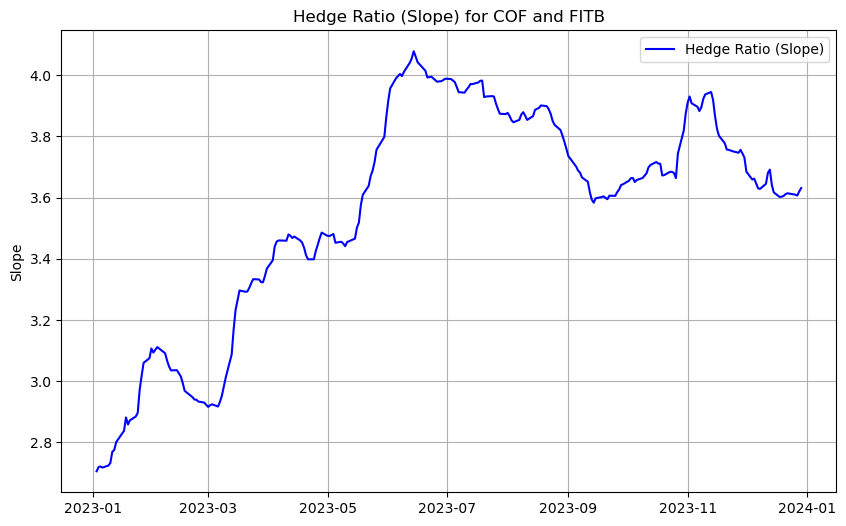

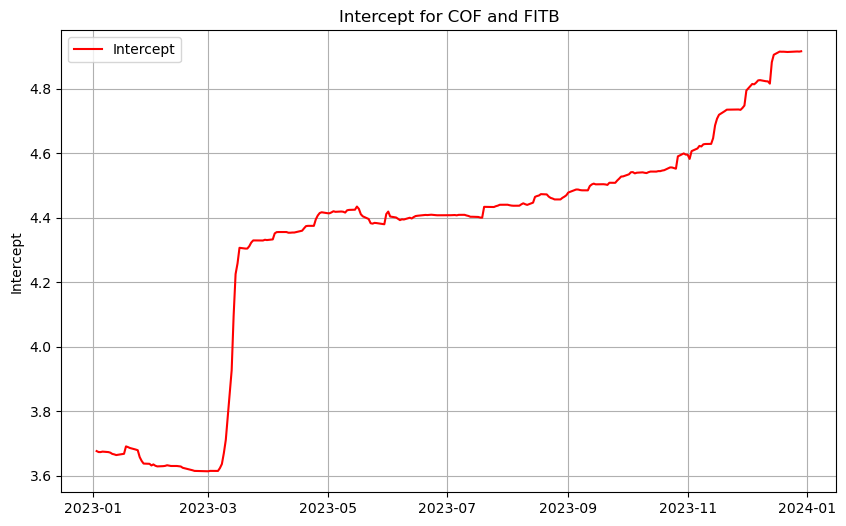

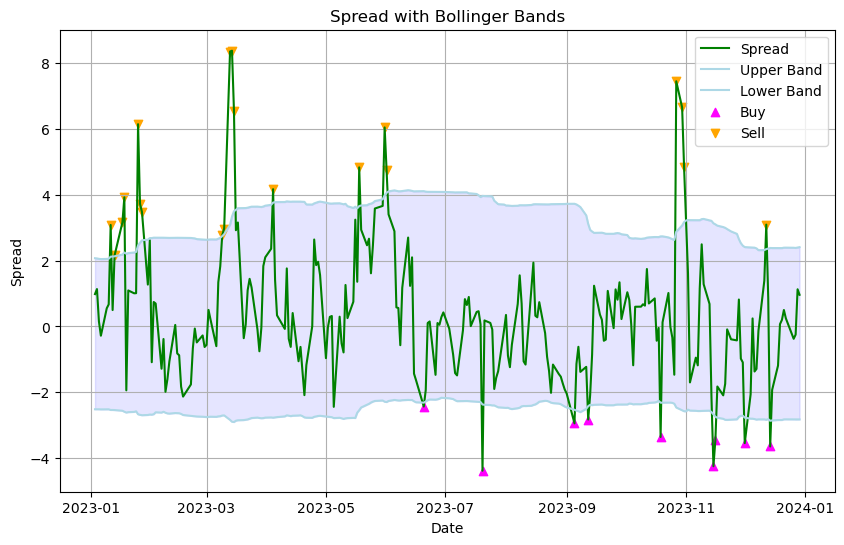

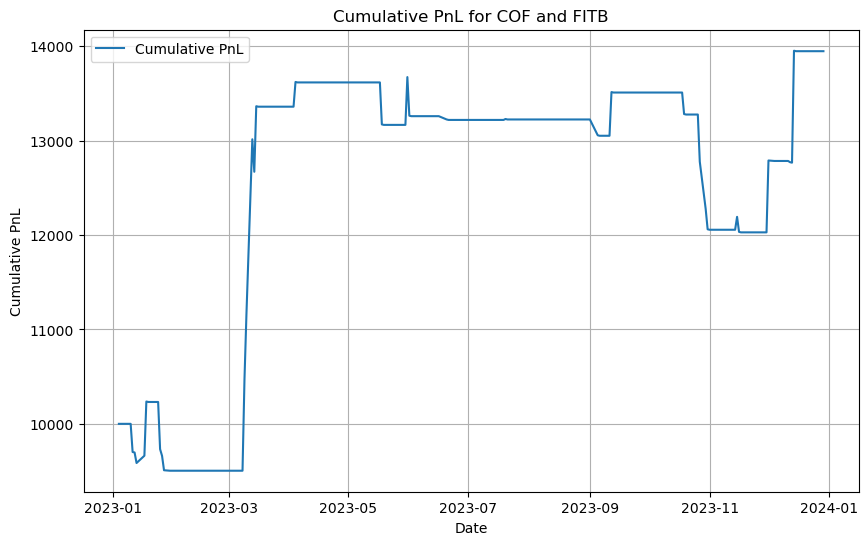

Performance Metrics for pair COF and FITB:
Cumulative Return: 39.48%
Sharpe Ratio: 1.275
Sortino Ratio: 1.443
Max Drawdown: -15.62%
Calmar Ratio: 2.54
No of trade: 17.0
Signals for pair COF and FITB:
              spread  upper_band  lower_band  moving_average_30   long  short  \
date                                                                            
2023-01-03  0.982024    2.072369   -2.518640          -0.283047  False  False   
2023-01-04  1.135534    2.065802   -2.517312          -0.132690  False  False   
2023-01-05  0.153021    2.053435   -2.518659          -0.092064  False  False   
2023-01-06 -0.283340    2.046422   -2.522522          -0.049260  False  False   
2023-01-09  0.550217    2.050776   -2.521479           0.003552  False  False   

            exit  buy  sell  position  
date                                   
2023-01-03  True  NaN   NaN         0  
2023-01-04  True  NaN   NaN         0  
2023-01-05  True  NaN   NaN         0  
2023-01-06  True  NaN   NaN     

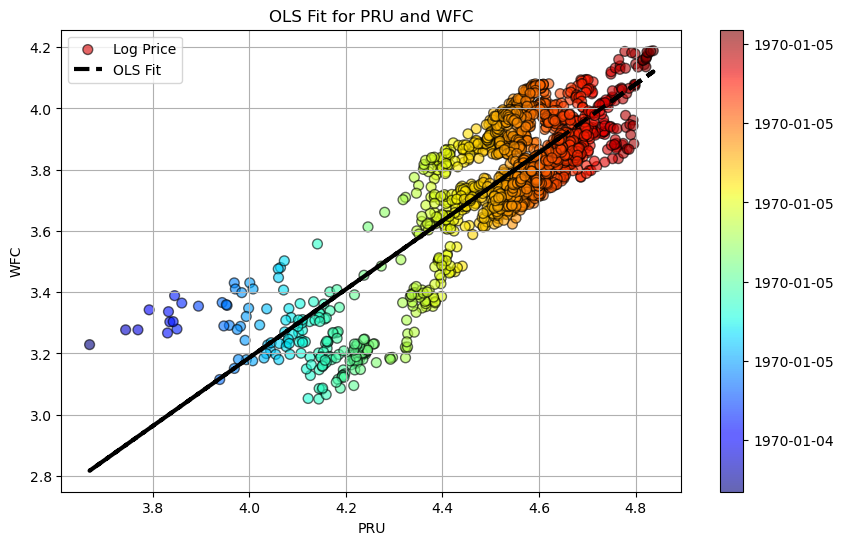

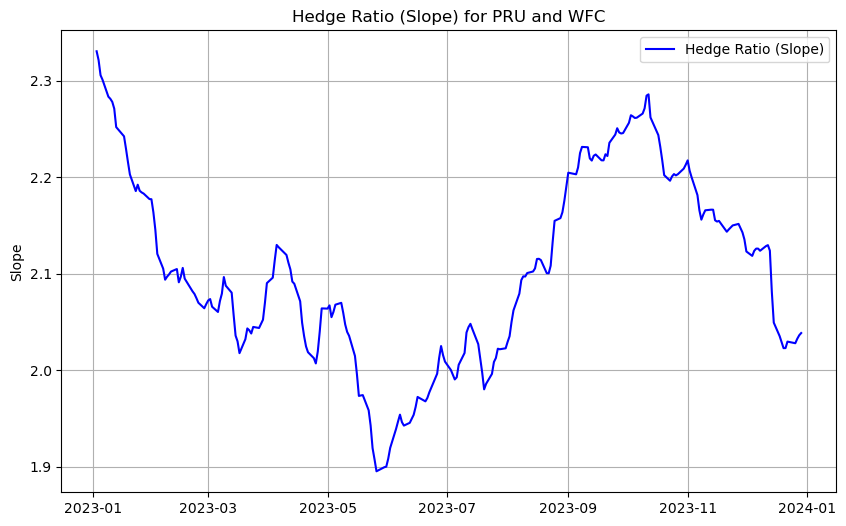

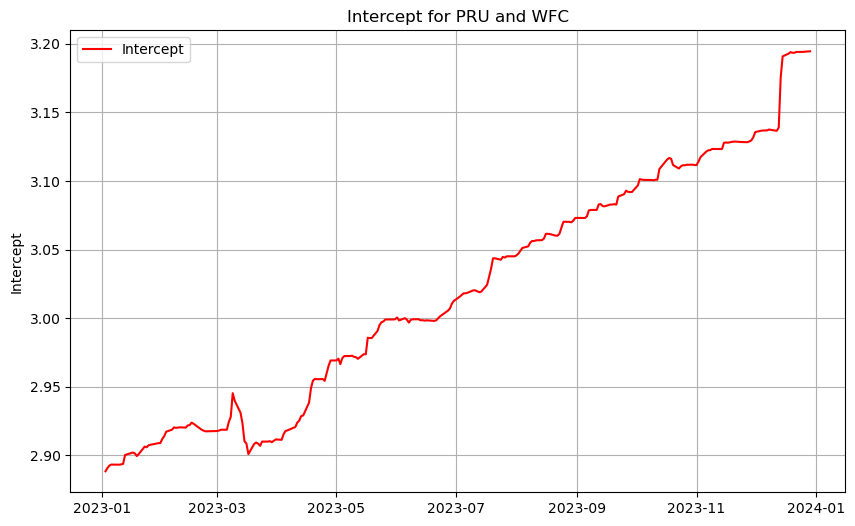

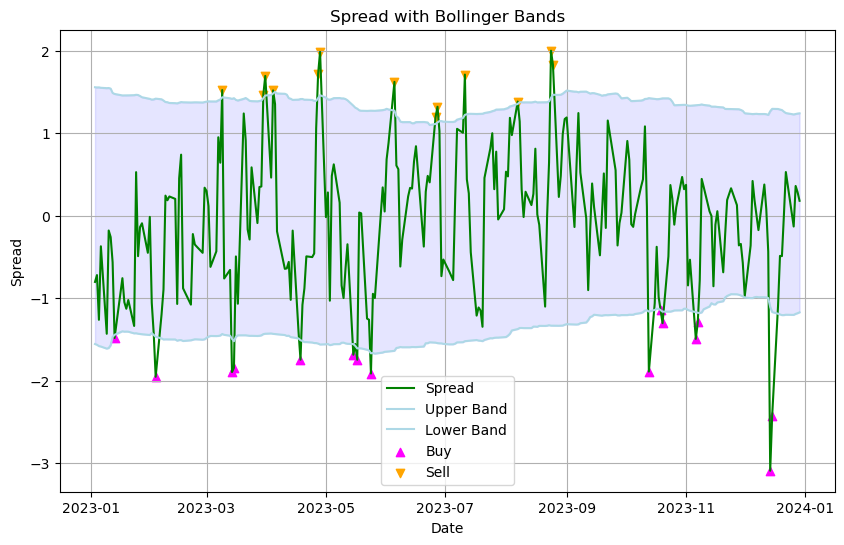

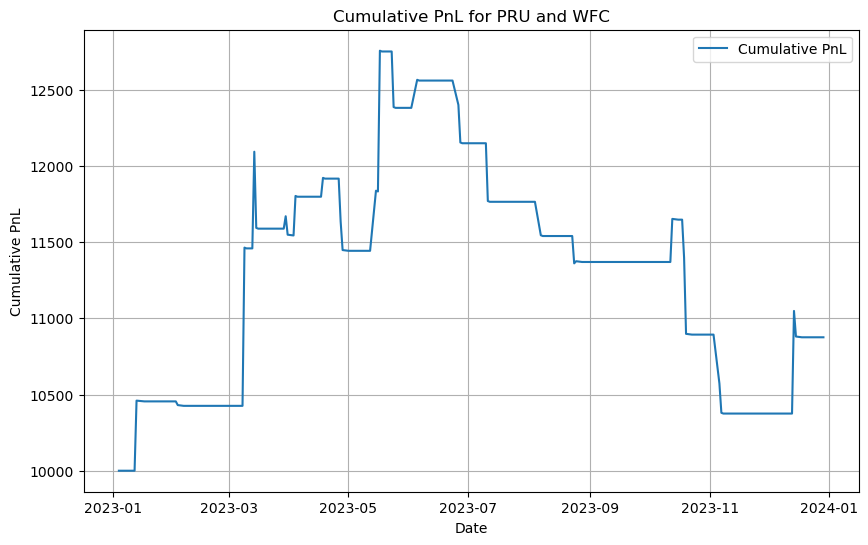

Performance Metrics for pair PRU and WFC:
Cumulative Return: 8.76%
Sharpe Ratio: 0.407
Sortino Ratio: 0.366
Max Drawdown: -21.60%
Calmar Ratio: 0.41
No of trade: 20.0
Signals for pair PRU and WFC:
              spread  upper_band  lower_band  moving_average_30   long  short  \
date                                                                            
2023-01-03 -0.802029    1.558083   -1.555218           0.230852  False  False   
2023-01-04 -0.719157    1.555539   -1.563755           0.210232  False  False   
2023-01-05 -1.261431    1.556495   -1.579999           0.193576  False  False   
2023-01-06 -0.369941    1.551680   -1.585365           0.176797  False  False   
2023-01-09 -1.430582    1.547055   -1.610452           0.167794  False  False   

            exit  buy  sell  position  
date                                   
2023-01-03  True  NaN   NaN         0  
2023-01-04  True  NaN   NaN         0  
2023-01-05  True  NaN   NaN         0  
2023-01-06  True  NaN   NaN        

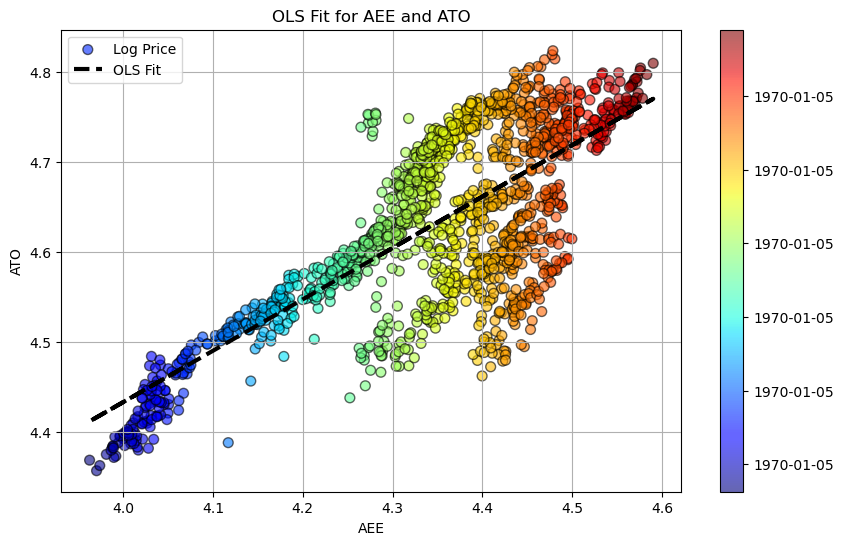

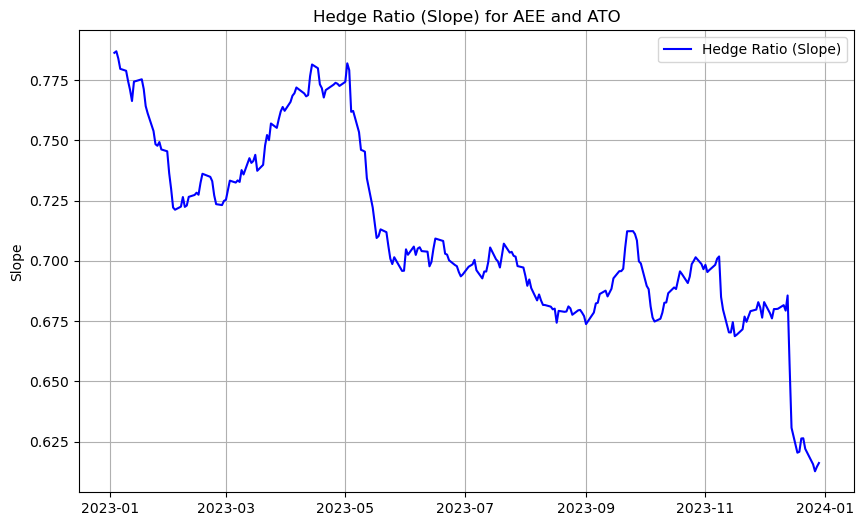

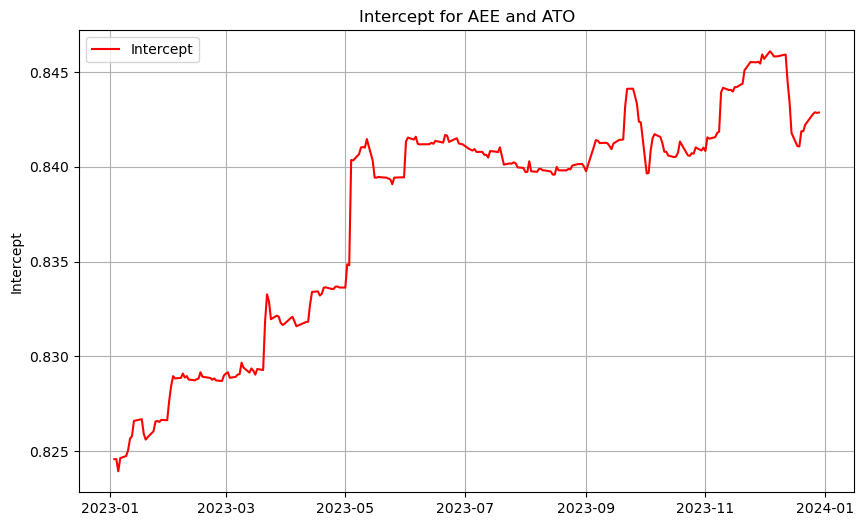

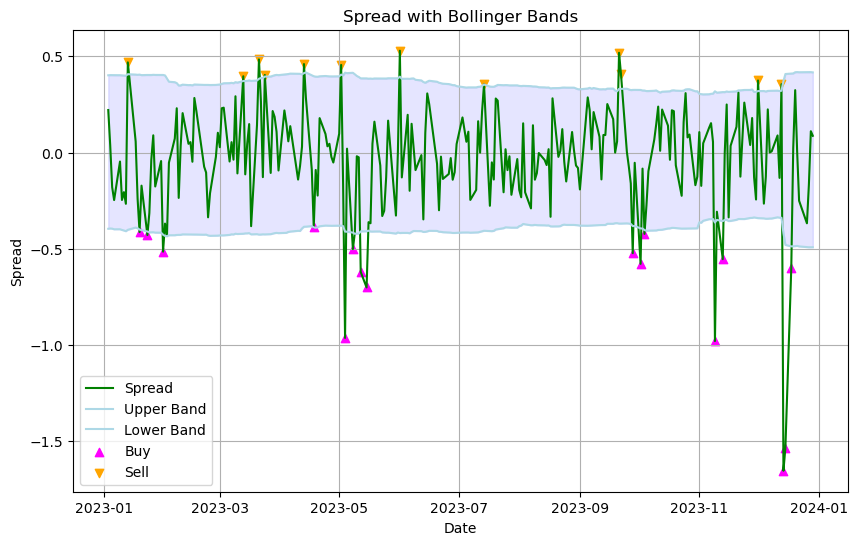

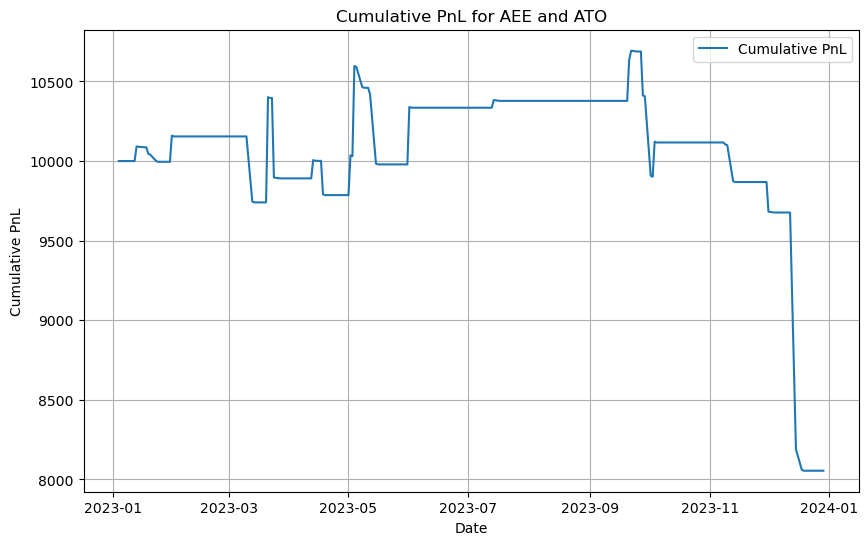

Performance Metrics for pair AEE and ATO:
Cumulative Return: -19.45%
Sharpe Ratio: -1.139
Sortino Ratio: -0.685
Max Drawdown: -23.67%
Calmar Ratio: -0.82
No of trade: 24.0
Signals for pair AEE and ATO:
              spread  upper_band  lower_band  moving_average_30   long  short  \
date                                                                            
2023-01-03  0.220798    0.401471   -0.396384           0.081934  False  False   
2023-01-04  0.037354    0.402380   -0.394966           0.086170  False  False   
2023-01-05 -0.180451    0.402337   -0.395763           0.080811  False  False   
2023-01-06 -0.247085    0.401804   -0.399117           0.081549  False  False   
2023-01-09 -0.046959    0.401911   -0.398905           0.081584  False  False   

            exit  buy  sell  position  
date                                   
2023-01-03  True  NaN   NaN         0  
2023-01-04  True  NaN   NaN         0  
2023-01-05  True  NaN   NaN         0  
2023-01-06  True  NaN   NaN   

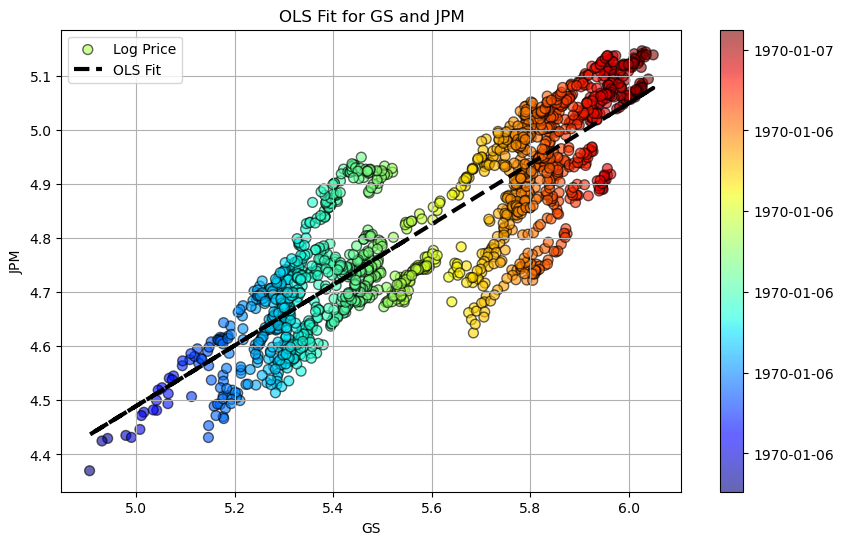

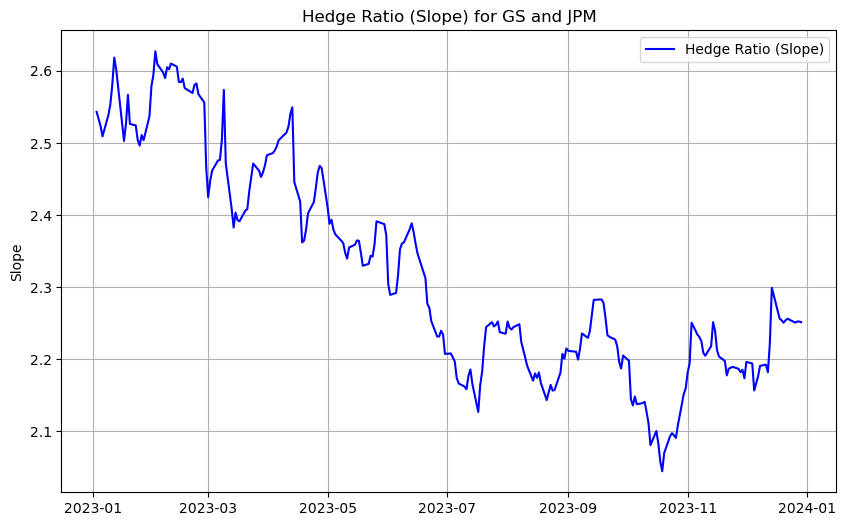

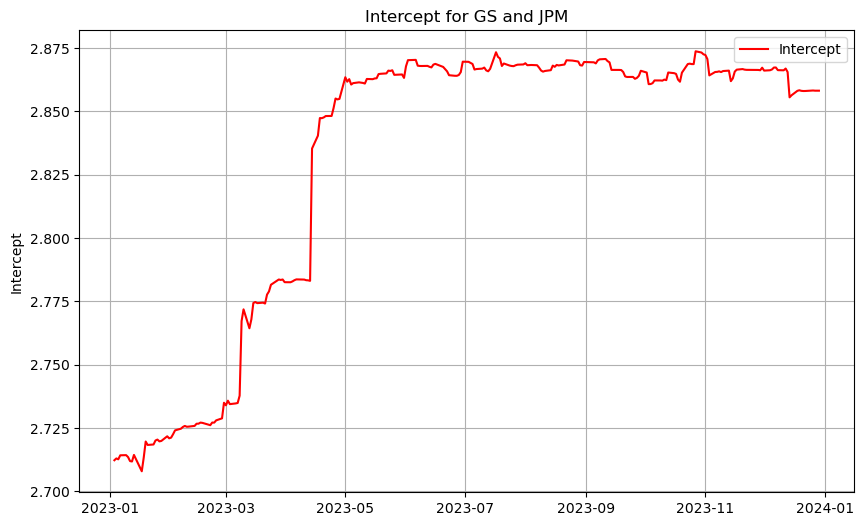

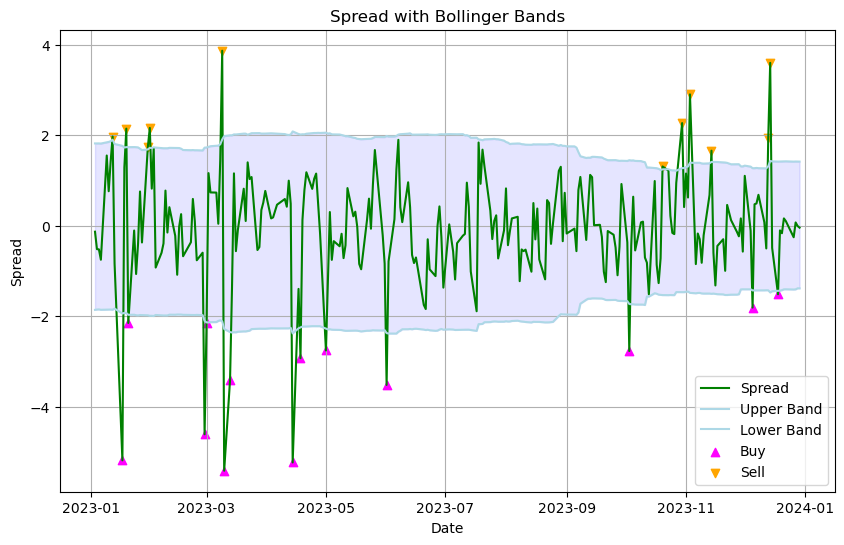

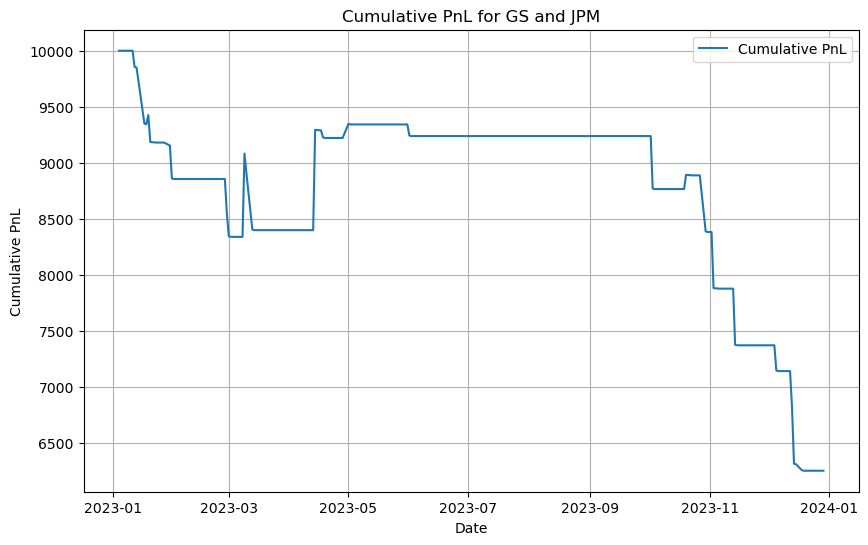

Performance Metrics for pair GS and JPM:
Cumulative Return: -37.44%
Sharpe Ratio: -1.993
Sortino Ratio: -1.237
Max Drawdown: -32.46%
Calmar Ratio: -1.16
No of trade: 20.0
Signals for pair GS and JPM:
              spread  upper_band  lower_band  moving_average_30   long  short  \
date                                                                            
2023-01-03 -0.131010    1.819490   -1.857482          -0.542084  False  False   
2023-01-04 -0.516514    1.819878   -1.850760          -0.516375  False  False   
2023-01-05 -0.521343    1.820283   -1.847880          -0.552464  False  False   
2023-01-06 -0.750284    1.817354   -1.856118          -0.564202  False  False   
2023-01-09  1.552406    1.843991   -1.852544          -0.493118  False  False   

            exit  buy  sell  position  
date                                   
2023-01-03  True  NaN   NaN         0  
2023-01-04  True  NaN   NaN         0  
2023-01-05  True  NaN   NaN         0  
2023-01-06  True  NaN   NaN     

In [66]:
# Function to implement the Kalman Filter
def kalman_filter_model(y, x):
    delta = 1e-4 
    trans_cov = delta / (1 - delta) * np.eye(2)  # Transition covariance
    obs_mat = np.vstack([x, np.ones(len(x))]).T[:, np.newaxis]

    kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, 
                      initial_state_mean=[0, 0],
                      initial_state_covariance=np.ones((2, 2)),
                      transition_matrices=np.eye(2),
                      observation_matrices=obs_mat,
                      observation_covariance=1.0,
                      transition_covariance=trans_cov)

    state_means, state_covs = kf.filter(y)
    return state_means, state_covs


def generate_signals_bollinger(spread, window=125, z_score_threshold=1.5, ma_window=30):
    rolling_mean = spread.rolling(window=window).mean()
    rolling_std = spread.rolling(window=window).std()
    upper_band = rolling_mean + z_score_threshold * rolling_std
    lower_band = rolling_mean - z_score_threshold * rolling_std
    moving_average_30 = spread.rolling(window=ma_window).mean() 

    signals = pd.DataFrame(index=spread.index)
    signals['spread'] = spread
    signals['upper_band'] = upper_band
    signals['lower_band'] = lower_band
    signals['moving_average_30'] = moving_average_30
    signals['long'] = spread < lower_band
    signals['short'] = spread > upper_band
    signals['exit'] = (spread >= lower_band) & (spread <= upper_band)

    # Create buy and sell signals
    signals['buy'] = np.where(signals['long'], spread, np.nan)
    signals['sell'] = np.where(signals['short'], spread, np.nan)

    return signals



# Function to calculate PnL with stop-loss
def calculate_pnl_with_stop_loss(data, signals, hedge_ratio, stop_loss=0.05, trading_cost=0.05, initial_capital=initial_capital):
    returns = data.pct_change().dropna()
    positions = pd.DataFrame(index=signals.index).fillna(0.0)

    positions['long'] = signals['long'].astype(int)
    positions['short'] = signals['short'].astype(int)
    
    positions['hedge_ratio'] = hedge_ratio
    positions['spread'] = positions['long'] - positions['short']
    
    pnl = positions['spread'] * returns.sum(axis=1)

    # Apply trading costs when position changes
    position_changes = positions['spread'].diff().abs()
    costs = position_changes * trading_cost/100
    pnl -= costs

    cumulative_pnl = pnl.cumsum()
    
    # Apply stop-loss
    stop_loss_triggered = pnl < -stop_loss
    pnl[stop_loss_triggered] = -stop_loss
    cumulative_pnl = (1+pnl.cumsum())*initial_capital

    wealth_index = 1000 * (1 + pnl).cumprod()  # Assuming starting index of 1000
    previous_peaks = wealth_index.cummax()
    drawdown = (wealth_index - previous_peaks) / previous_peaks
    
    max_drawdown = drawdown.min()  # Calculate maximum drawdown

    return pnl, cumulative_pnl, drawdown, max_drawdown

# Function to calculate performance metrics
def calculate_performance_metrics(cumulative_pnl, pnl, max_drawdown, signals, trading_period_years):
    cumulative_return = cumulative_pnl[-1]  # Cumulative return in absolute monetary value
    annual_return = ((cumulative_return / initial_capital) - 1) / trading_period_years  # Normalized by years
    sharpe_ratio = pnl.mean() / pnl.std() * np.sqrt(252)  # Assuming daily returns
    sortino_ratio = pnl.mean() / pnl[pnl < 0].std() * np.sqrt(252)  # Assuming daily returns
    max_drawdown_pct = max_drawdown * 100  # Max drawdown in percentage
    calmar_ratio = annual_return / -max_drawdown if max_drawdown != 0 else float('inf')  # Avoid division by zero

    # Calculate number of trades
    signals['position'] = signals['long'] * 1 + signals['short'] * -1  # Create a position indicator: 1 for long, -1 for short, 0 for no position

    position_changes = signals['position'].diff().fillna(0).abs()  # Compute the absolute difference to capture any change from 0 to 1/-1 or 1 to -1 and vice versa

    # Any non-zero change in position is a trade
    number_of_trades = position_changes[position_changes != 0].sum() // 2 

    return cumulative_return, annual_return, sharpe_ratio, sortino_ratio, max_drawdown_pct, calmar_ratio, number_of_trades


# Iterate over each pair
for stock1, stock2 in final_pairs:
    # Ensure both stocks are in the dataset
    if stock1 not in data.columns or stock2 not in data.columns:
        print(f"One of the stocks {stock1} or {stock2} is not in the dataset.")
        continue

    # Extract price series
    y = data[stock1].values
    x = data[stock2].values
    
    # Apply the Kalman Filter
    state_means, state_covs = kalman_filter_model(y, x)
    hedge_ratio = state_means[:, 0]
    intercept = state_means[:, 1]
    spread = y - hedge_ratio * x - intercept

    # Convert spread to a pandas Series
    spread = pd.Series(spread, index=data.index)

    # Generate trading signals based on Bollinger Bands
    signals = generate_signals_bollinger(spread)

    # Filter the signals for the trading period
    signals = signals[(signals.index >= trading_start_date) & (signals.index <= trading_end_date)]
    spread = spread[(spread.index >= trading_start_date) & (spread.index <= trading_end_date)]
    hedge_ratio = pd.Series(state_means[:, 0], index=data.index).loc[trading_start_date:trading_end_date]

    # Calculate PnL with stop-loss
    pnl, cumulative_pnl, drawdown, max_drawdown = calculate_pnl_with_stop_loss(data[[stock1, stock2]], signals, hedge_ratio)

    # Calculate performance metrics
    cumulative_return, annual_return, sharpe_ratio, sortino_ratio, max_drawdown_pct, calmar_ratio, number_of_trades = calculate_performance_metrics(cumulative_pnl, pnl, max_drawdown, signals, trading_period_years)


    # Add scatter plot with OLS fit
    symbols = [stock1, stock2]
    x = np.log(data[symbols[0]])
    y = np.log(data[symbols[1]])
    beta, alpha = np.polyfit(x, y, 1)
    y_pred = x * beta + alpha

    plt.figure(figsize=(10, 6))
    cm = plt.get_cmap('jet')
    sc = plt.scatter(x, y, s=50, c=x, cmap=cm, marker='o', alpha=0.6, label='Log Price', edgecolor='k')
    plt.plot(x, y_pred, '--', c='black', linewidth=3, label='OLS Fit')
    plt.legend()
    # Create colorbar and format the date labels
    cb = plt.colorbar(sc)
    date_format = DateFormatter("%Y-%m-%d")
    cb.ax.yaxis.set_major_formatter(date_format)  # Format date to remove time
    plt.xlabel(symbols[0])
    plt.ylabel(symbols[1])
    plt.title(f'OLS Fit for {stock1} and {stock2}')
    plt.grid(True)  # Add grid
    plt.show()

    # Plot the slope (hedge ratio) over time
    plt.figure(figsize=(10, 6))
    plt.plot(signals.index, hedge_ratio[-len(signals):], label='Hedge Ratio (Slope)', color='blue')
    plt.ylabel('Slope')
    plt.title(f'Hedge Ratio (Slope) for {stock1} and {stock2}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the intercept over time
    plt.figure(figsize=(10, 6))
    plt.plot(signals.index, intercept[-len(signals):], label='Intercept', color='red')
    plt.ylabel('Intercept')
    plt.title(f'Intercept for {stock1} and {stock2}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the results with Bollinger Bands
    plt.figure(figsize=(10, 6))
    plt.plot(spread.index, spread, label='Spread', color='green')
    plt.plot(signals.index, signals['upper_band'], color='lightblue', linestyle='-', label='Upper Band')
    plt.plot(signals.index, signals['lower_band'], color='lightblue', linestyle='-', label='Lower Band')
    plt.fill_between(signals.index, signals['lower_band'], signals['upper_band'], color='blue', alpha=0.1)
    plt.scatter(signals.index, signals['buy'], color='magenta', marker='^', label='Buy')
    plt.scatter(signals.index, signals['sell'], color='orange', marker='v', label='Sell')
    plt.legend()
    plt.grid(True)
    plt.title('Spread with Bollinger Bands')
    plt.xlabel("Date")
    plt.ylabel("Spread")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_pnl, label='Cumulative PnL')
    # plt.plot(drawdown, label='Drawdown', color='orange')
    plt.legend()
    plt.grid(True)
    plt.title(f'Cumulative PnL for {stock1} and {stock2}')
    plt.xlabel("Date")
    plt.ylabel("Cumulative PnL")
    plt.show()

    # Print performance metrics
    print(f"Performance Metrics for pair {stock1} and {stock2}:")
    print(f"Cumulative Return: {(cumulative_return-initial_capital)/initial_capital*100:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.3f}")
    print(f"Sortino Ratio: {sortino_ratio:.3f}")
    print(f"Max Drawdown: {max_drawdown_pct:.2f}%")
    print(f"Calmar Ratio: {calmar_ratio:.2f}")
    print(f"No of trade: {number_of_trades}")

    # Print signals and PnL for inspection
    print(f"Signals for pair {stock1} and {stock2}:")
    print(signals.head())
    print(f"PnL for pair {stock1} and {stock2}:")
    print(pnl.head())

In [ ]:
spread

date
2023-01-03    0.367238
2023-01-04    0.260291
2023-01-05    0.187685
2023-01-06    0.412255
2023-01-09    0.733192
                ...   
2023-12-22   -0.212913
2023-12-26   -0.047828
2023-12-27   -0.095277
2023-12-28   -1.014663
2023-12-29    0.345721
Length: 250, dtype: float64